## Acknowledgement

This notebook is based on the book **["Build a Large Language Model (From Scratch)"](https://www.manning.com/books/build-a-large-language-model-from-scratch)** by **Sebastian Raschka**, published by Manning Publications.

- [Book on Manning](https://www.manning.com/books/build-a-large-language-model-from-scratch)
- [GitHub Repository](https://github.com/rasbt/LLMs-from-scratch)

---

# **Working with text data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/LLM from Scratch/chapter_2/')
print(os.getcwd())

/content/drive/MyDrive/LLM from Scratch/chapter_2


In [3]:
from IPython.display import Image, display
%matplotlib inline

## **Basic 3 stages of coding an LLM**

The main three steps of LLM can be considered to consist of three stage. At first stage, basic data preprocessing and sampling are done along with defining the attention mechanism and LLM architecture; this stage builds the LLM. At the second stage, LLM is pretrained on unlabeled data to obtain a foundation model for further finetuning. At the third stage, pretrained LLM from the second stage is fine-tuned for our objective, either for personal assistant or for chat model.

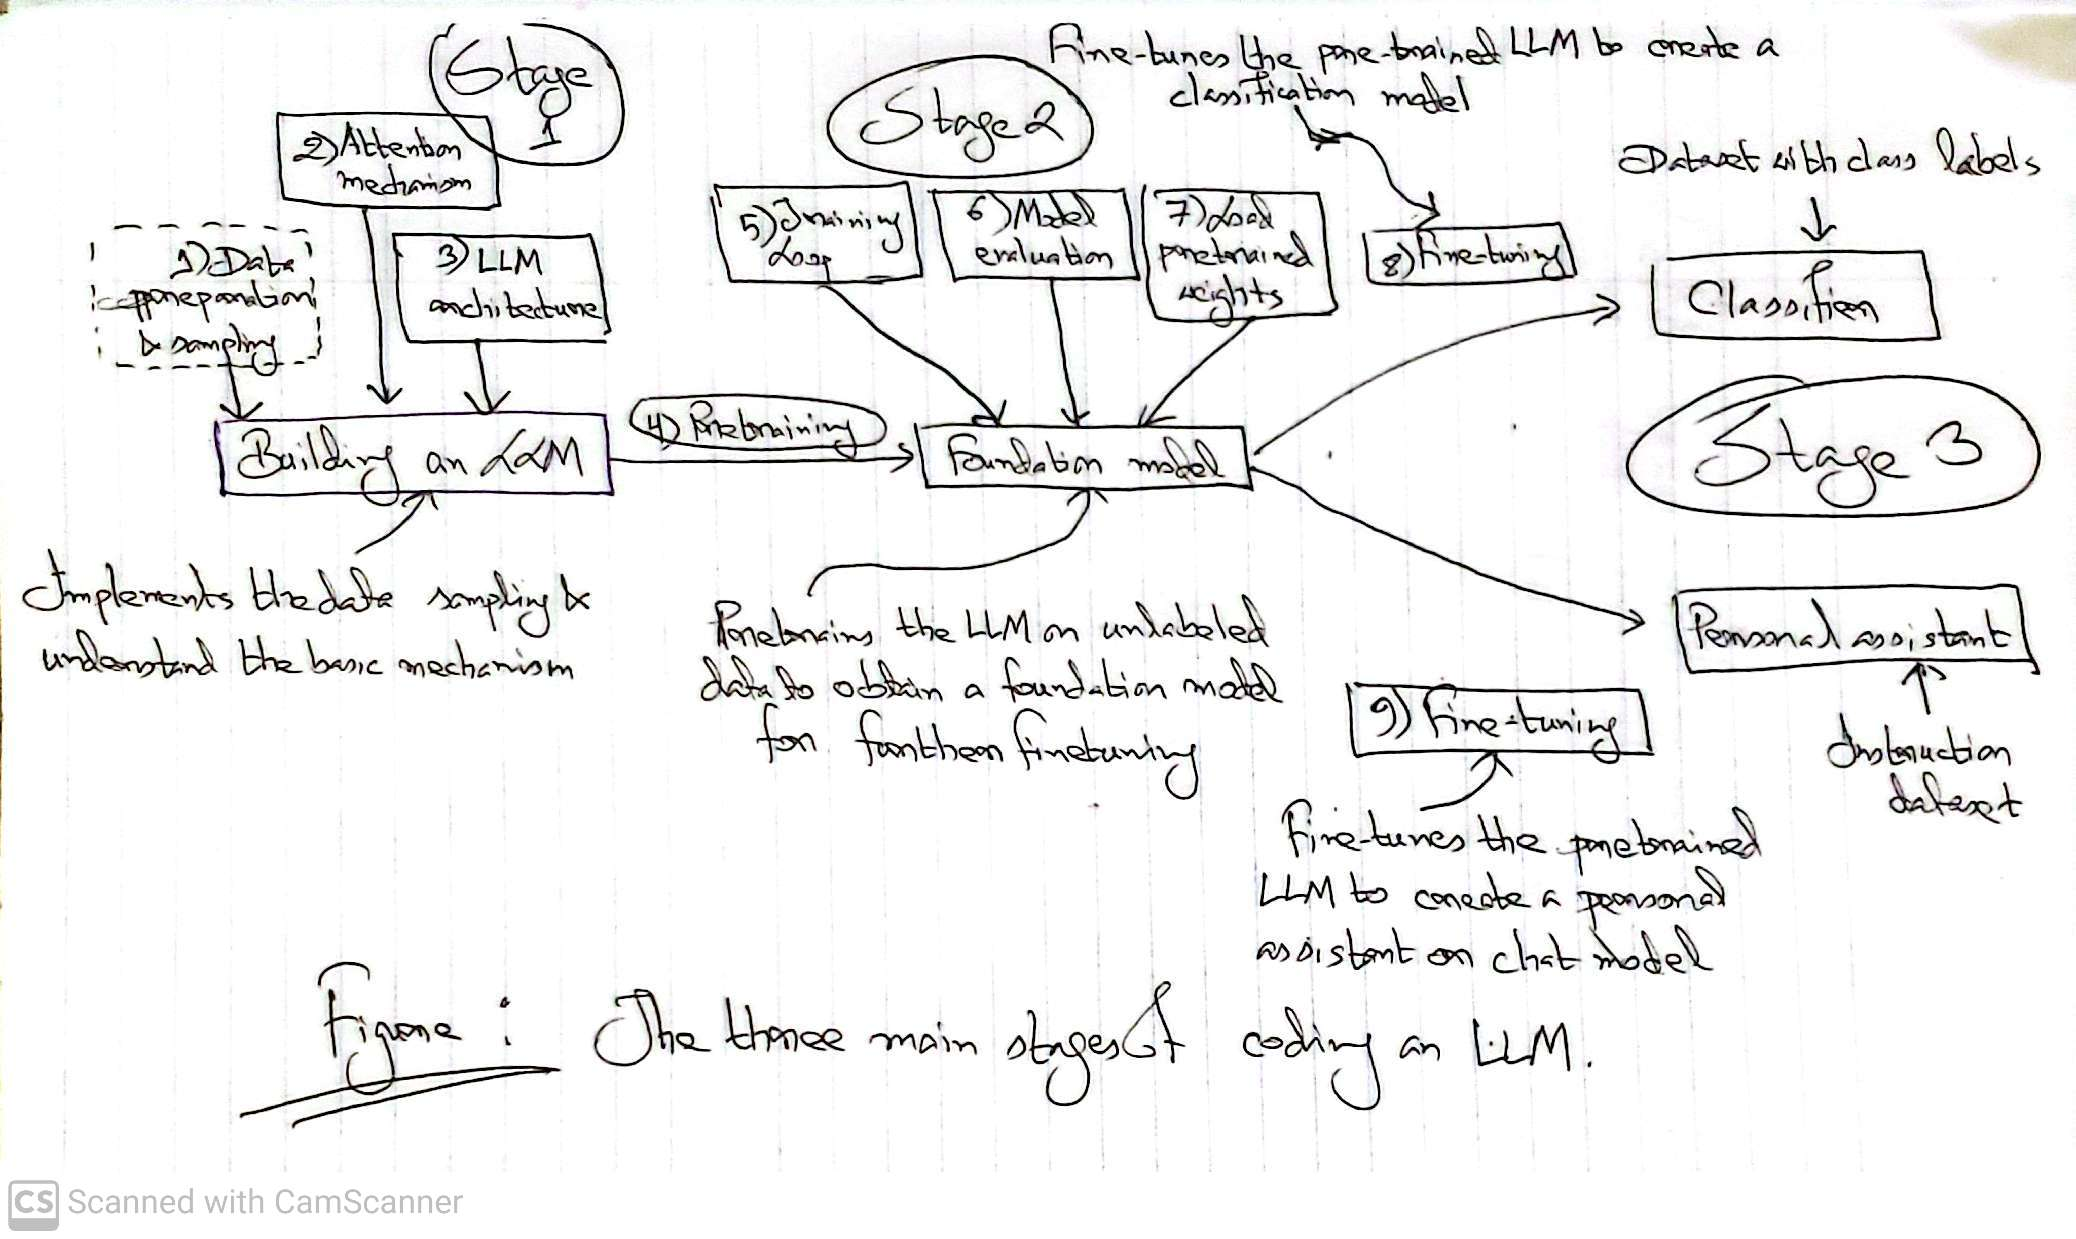

In [ ]:
display(Image(filename='2_1.jpg', width=800))

## What is an embedding?

An embedding is a way to convert things—like words, images, or sounds—into a list of numbers (called a vector) that a computer can understand and work with. Instead of dealing with raw data (like letters or pixels), embeddings capture the important features or meaning in a compact, numerical form. For example, an embedding can represent an image of a cat as a list of numbers that highlight the shape, color, and texture, so similar images have similar embeddings.

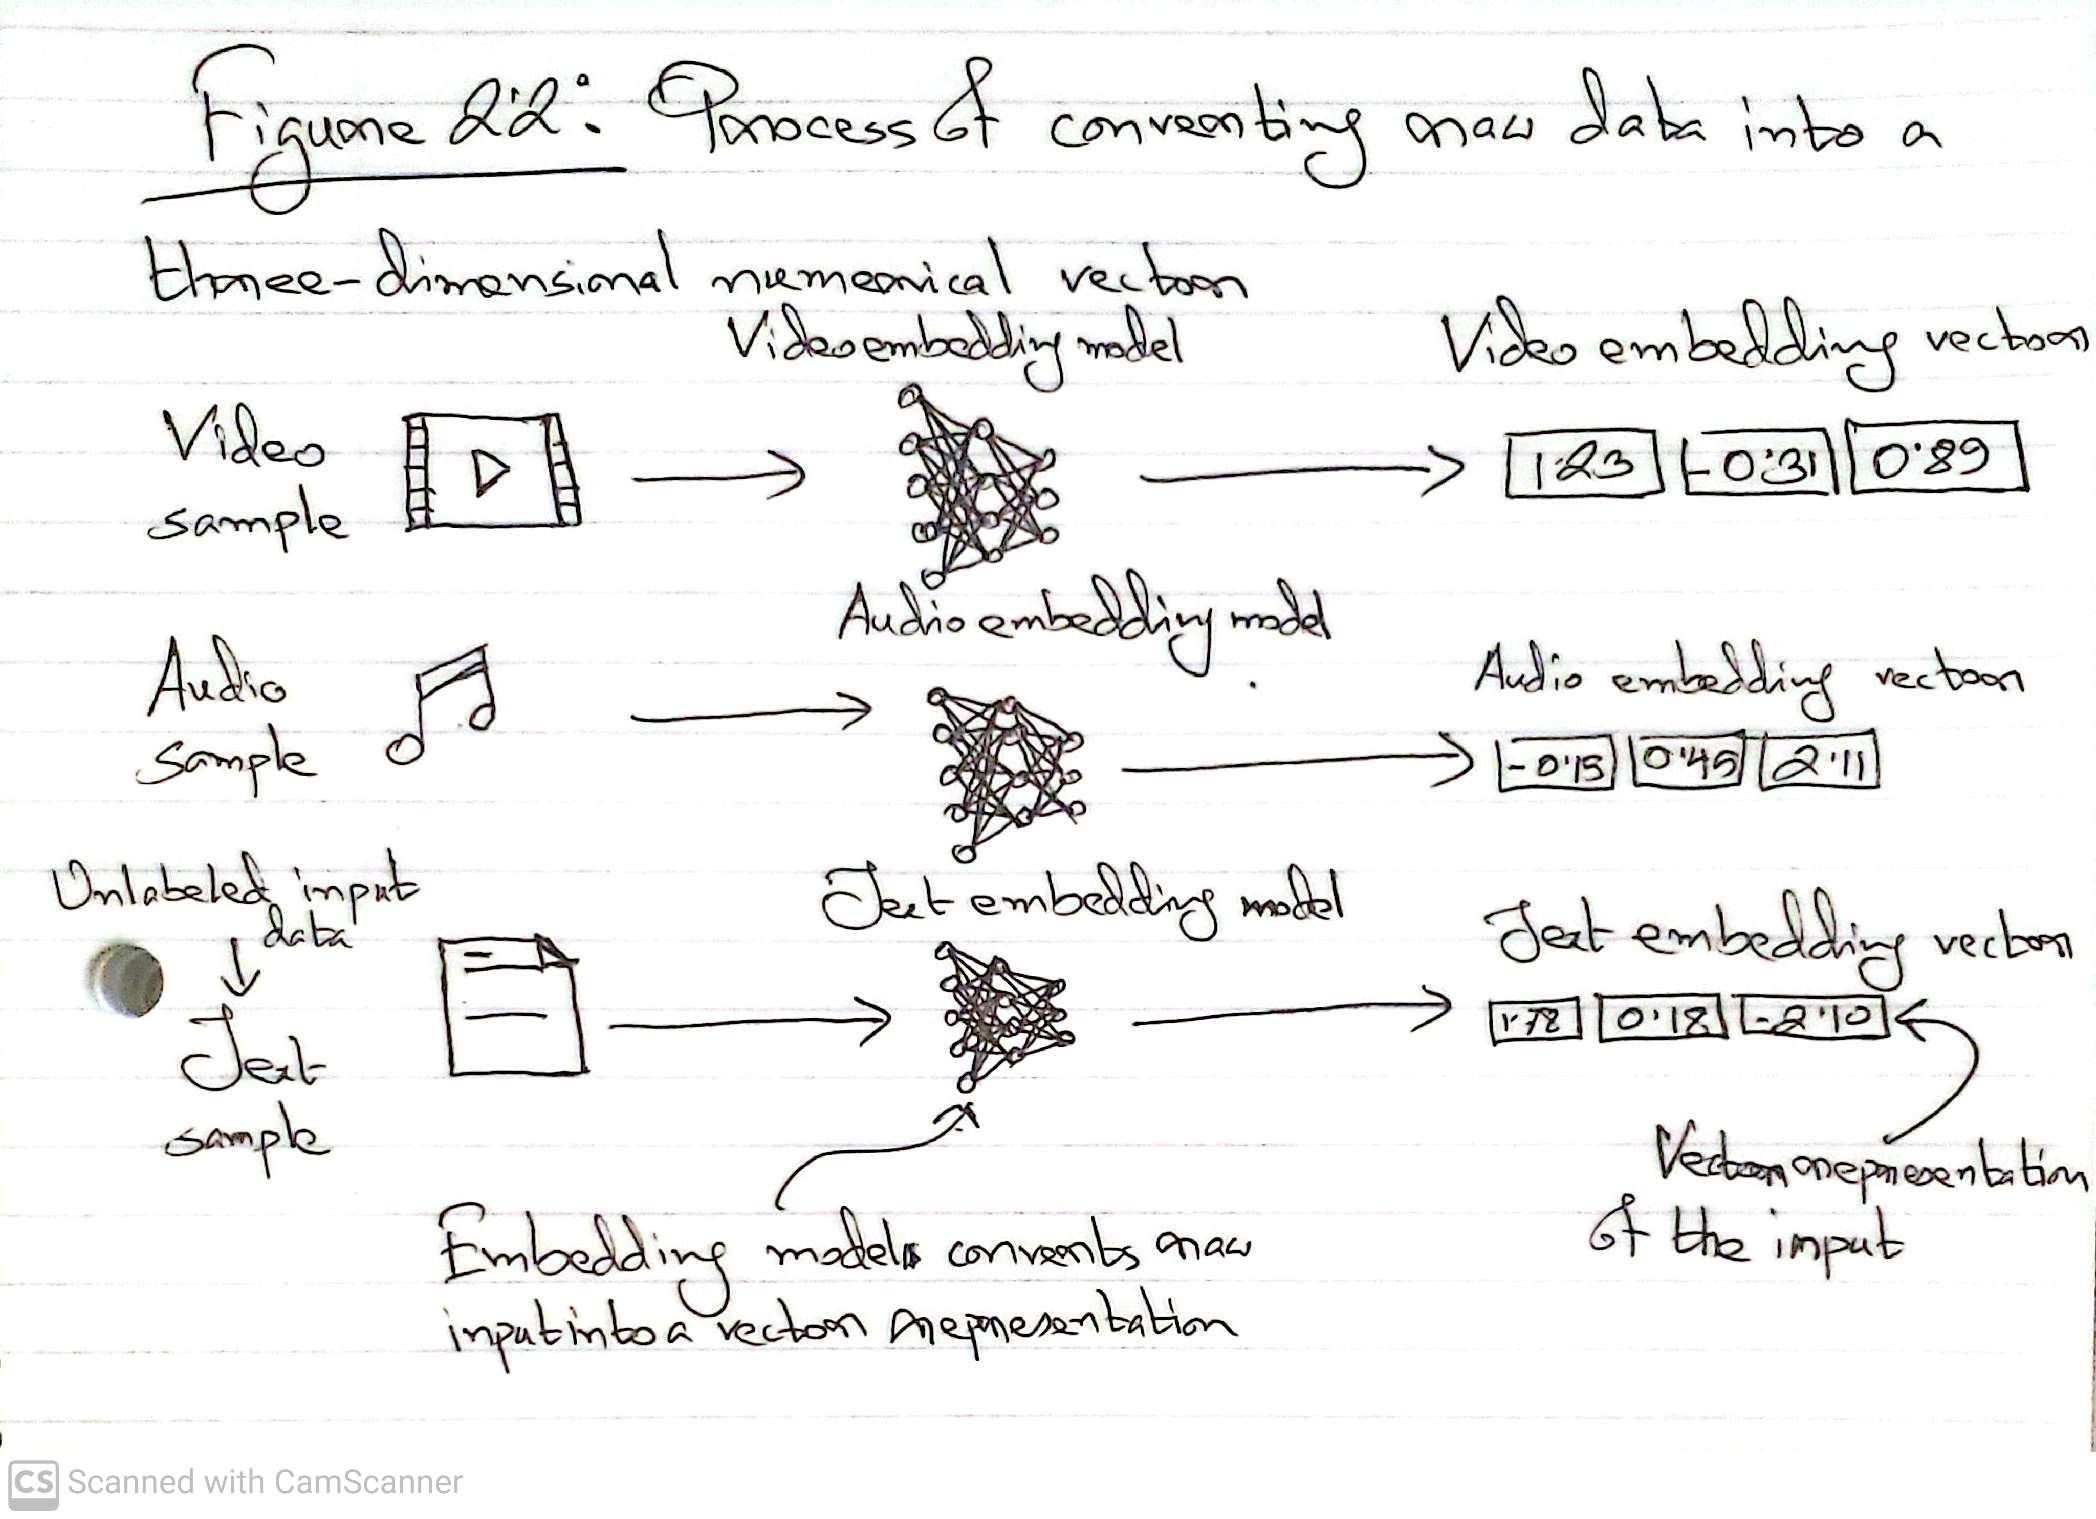

In [ ]:
display(Image(filename='2_2.jpg', width=800))

## What is a word embedding?

A word embedding is a specific kind of embedding that turns words into vectors of numbers. The goal is to represent the meaning of each word in such a way that words with similar meanings have similar vectors. For example, “happy” and “joyful” would have embeddings that are close to each other in this numerical space, while “happy” and “table” would be far apart.

In older methods, each word was assigned a fixed vector based on the contexts it appeared in during training, but this vector never changed depending on the sentence. So the word “bat” would have the same embedding whether it meant the animal or the baseball equipment.

## How do traditional embeddings work?

In older methods like Word2Vec or GloVe, each word in the vocabulary gets its own fixed embedding. These embeddings are learned by looking at lots of text and finding which words appear near each other. The idea is that words used in similar contexts tend to have similar meanings. However, these embeddings are static — the word “bank” has the same embedding whether it means a river bank or a money bank, which can be confusing.

## **Common Algorithms and Frameworks for Word Embeddings**
There are several popular algorithms and frameworks used to create word embeddings:

### **Word2Vec**
Developed by Google, Word2Vec is one of the earliest and most influential word embedding methods. It uses a neural network model to learn vector representations of words based on their context in a large corpus.

### **GloVe (Global Vectors for Word Representation)**
Developed by Stanford, GloVe combines the advantages of matrix factorization techniques and local context window methods. It uses global word co-occurrence counts to create embeddings.

### **FastText**
Developed by Facebook, FastText extends Word2Vec by representing words as bags of character n-grams. This helps handle rare or misspelled words better.

### **ELMo (Embeddings from Language Models)**
ELMo generates contextualized embeddings by using a deep bidirectional language model, so the word representation changes depending on context.

### **BERT and Transformer-based models**
These models generate contextual embeddings by training deep transformers with masked language modeling and other objectives.

### **Explanation of the Word2Vec Approach**
Word2Vec learns word embeddings by predicting the context words around a target word in a sentence. It has two main architectures:

- **Continuous Bag of Words (CBOW)**
    
  CBOW predicts a target word given the surrounding context words. For example, given the context words “The cat _ on the mat,” it tries to predict the missing word “sat.”

- **Skip-gram**
  
  Skip-gram does the reverse: it predicts the context words given a target word. For example, given the word “sat,” it tries to predict “The,” “cat,” “on,” “the,” and “mat.”

Word2Vec trains a simple neural network to do these predictions. During training, the model learns vector representations (embeddings) of words such that words used in similar contexts have similar vectors. This way, semantic relationships between words are captured.

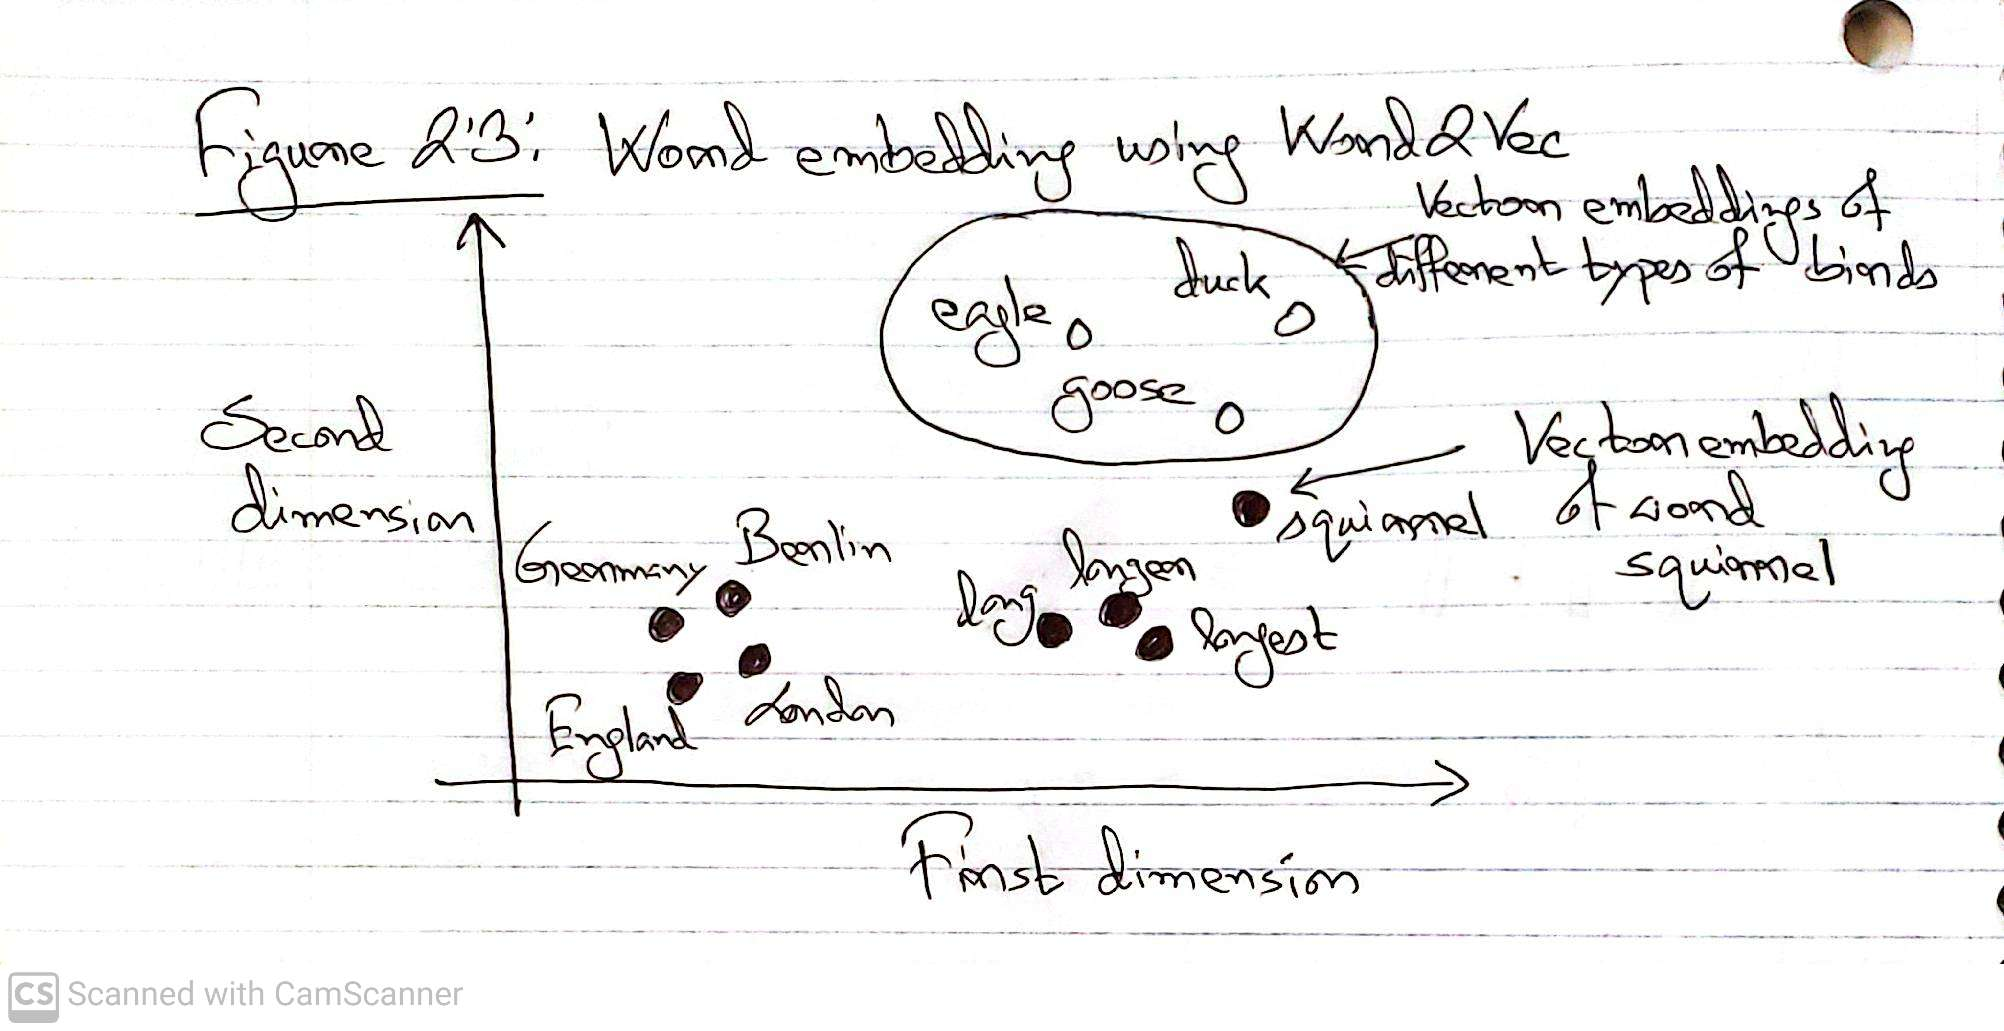

In [ ]:
display(Image(filename='2_3.jpg', width=800))

The image above shows a two-dimensional scatterplot of word embeddings, which are vectors representing different words. In reality, embeddings usually have hundreds of dimensions, but for visualization, the vectors are reduced to two dimensions. The plot groups words representing similar concepts close to each other. For example, different types of birds like “eagle,” “duck,” and “goose” are clustered together in the upper left area of the plot. The word “squirrel” appears away from the bird cluster, indicating that its vector embedding is different because it represents a different concept (a mammal, not a bird). The lower left cluster groups countries and cities like “Germany,” “Berlin,” “England,” and “London.” These words are close because they share geographical or political similarity. The lower right cluster shows related adjectives of length: “long,” “longer,” and “longest.” These words are grouped due to their morphological and semantic similarity. This visualization demonstrates how word embeddings can capture semantic relationships by placing related words close to each other in the vector space.

Normally, LLMs have much higher dimensionality, GPT-2 models (117M and 125M parameters) use an embedding size of 768 dimensions while GPT-3 model (175B parameters) uses an embedding size of 12,288 dimensions.

Now, we will learn how to prepare the embeddings for LLM that involves splitting text into words, converting words into tokens, and turning tokens into embedding vectors.

## Tokenizing text

Tokenizing text means breaking down a sentence or paragraph into smaller pieces called tokens that a computer can understand and process. These tokens can be whole words, parts of words, or even single characters. For example, the sentence “I love cats” might be split into three tokens: “I,” “love,” and “cats.” Tokenizing helps language models work with text by turning it into manageable chunks, so they can analyze the meaning, predict what comes next, or generate new sentences. Different models use different tokenizing methods depending on their design and language.

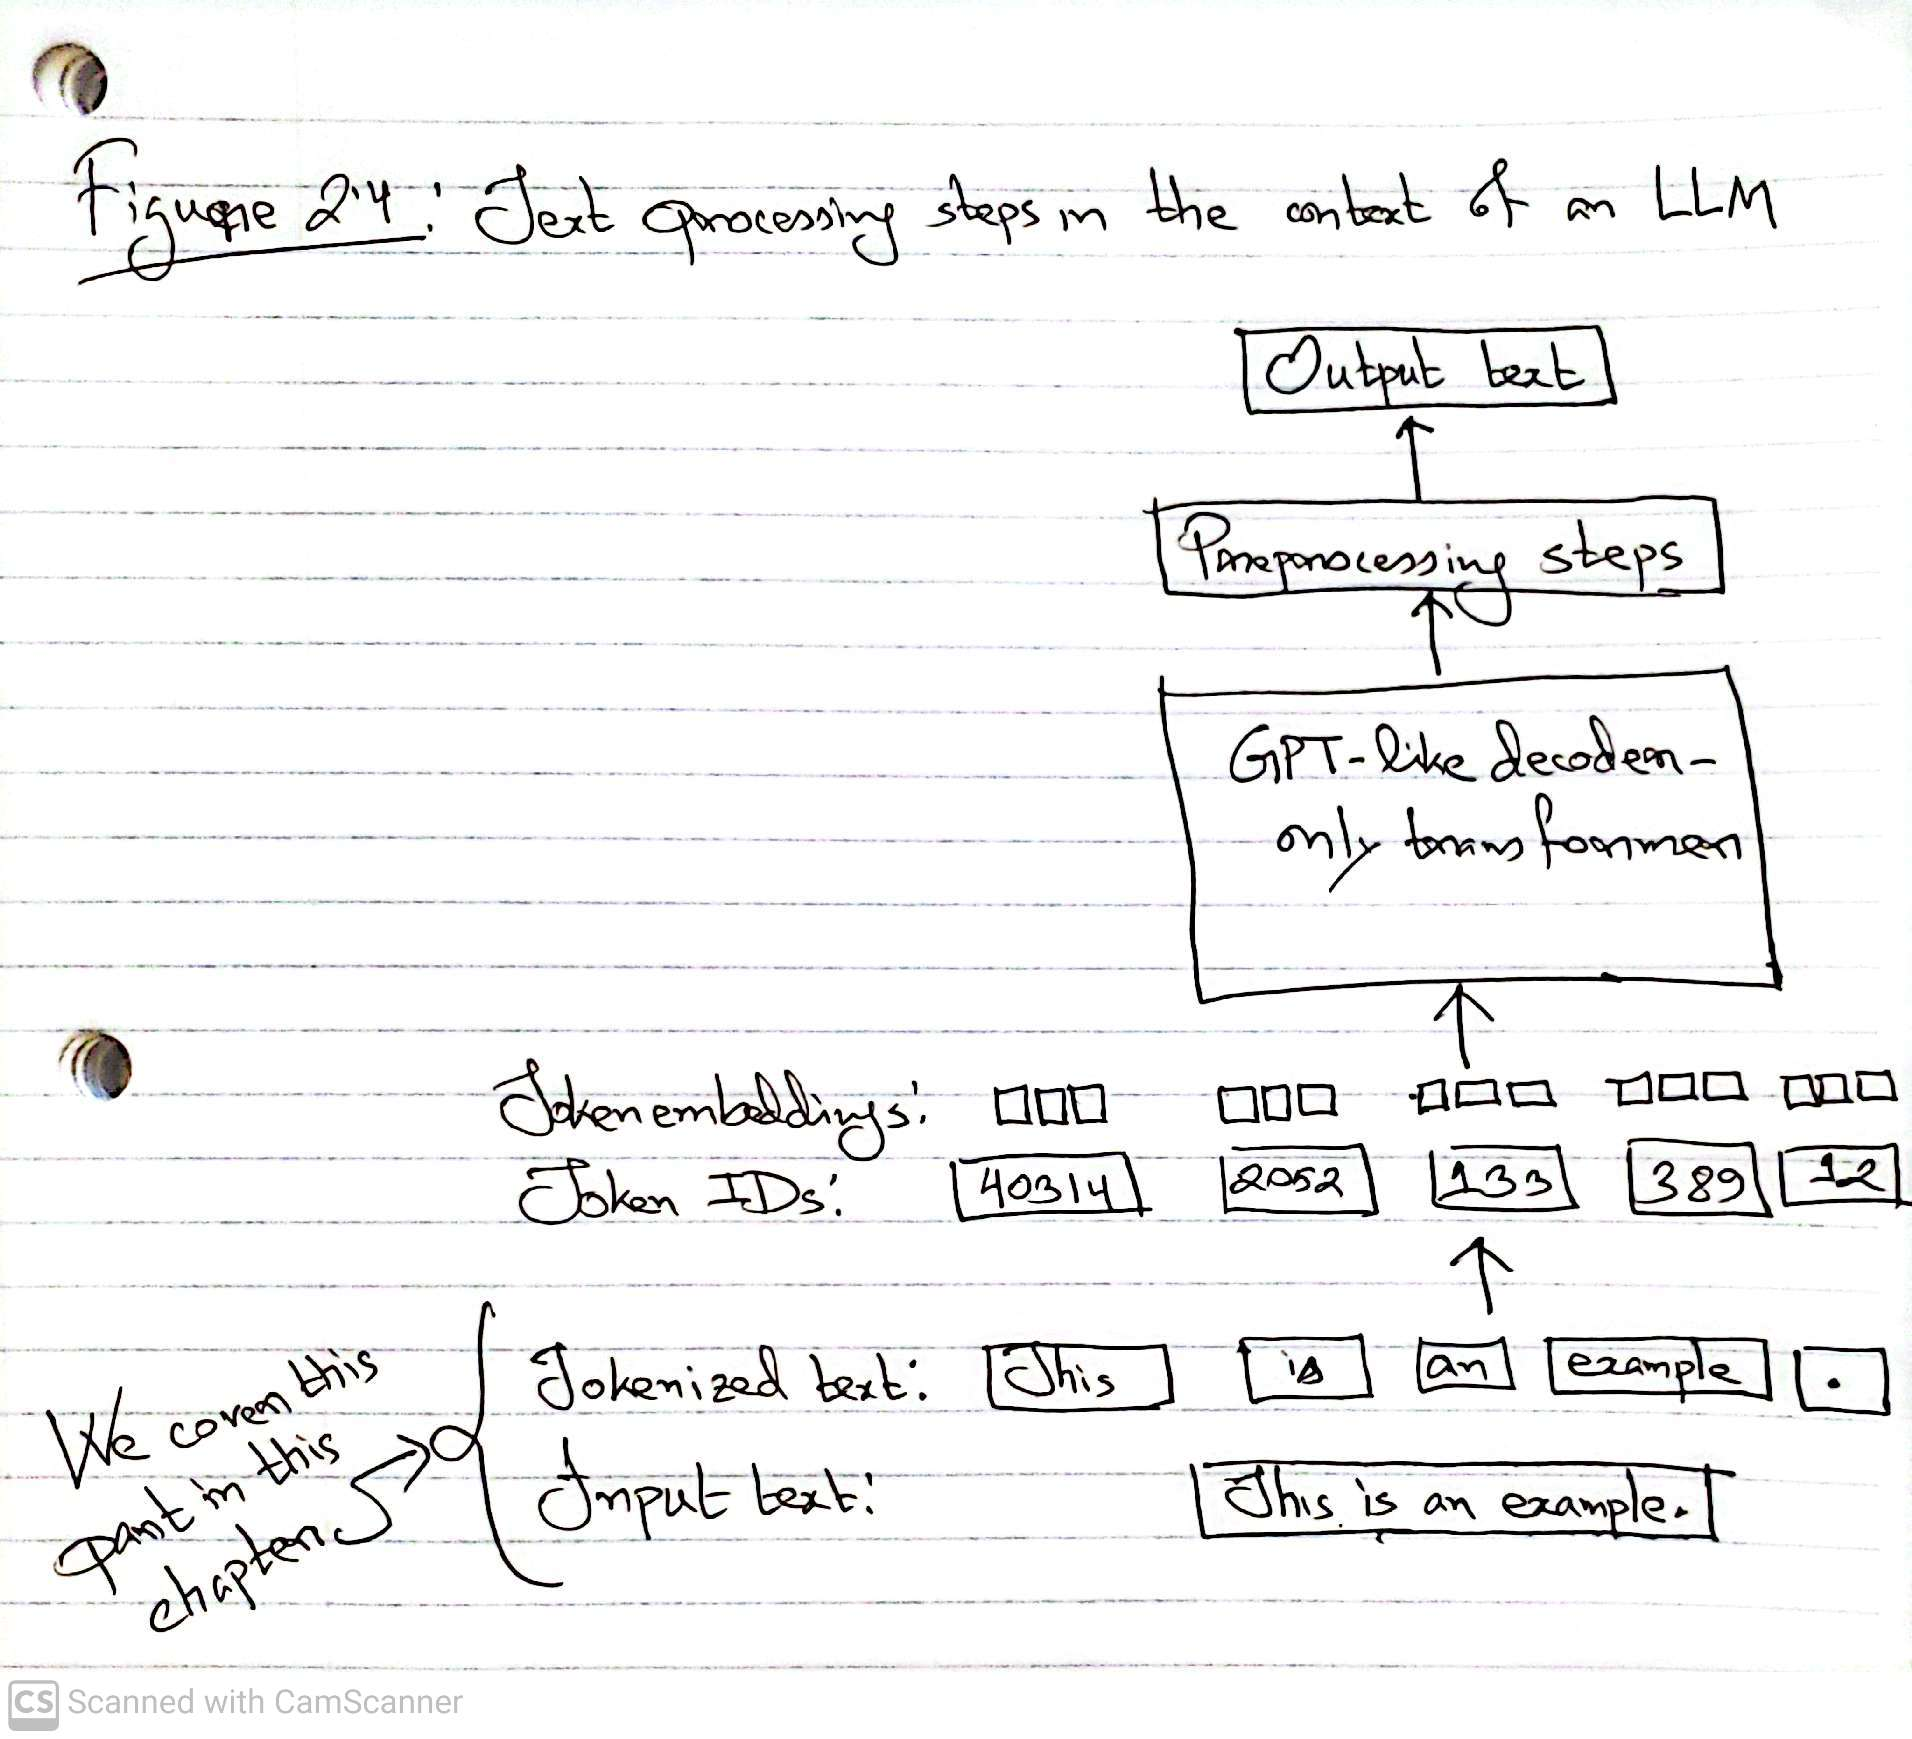

In [ ]:
display(Image(filename='2_4.jpg', width=800))

For LLM training now, we will tokenize texts from a short story named "The Verdict" by Edith Wharton. Now, the texts below will save this text from the github link to the address given by `file_path` variable.

In [4]:
# Set the path in Google Drive where the file will be saved
file_path = "/content/drive/My Drive/LLM from Scratch/the-verdict.txt"

In [5]:
# Download the file from the URL and save it to Google Drive
import urllib.request
url = ("https://raw.githubusercontent.com/rasbt/"
       "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
       "the-verdict.txt")
urllib.request.urlretrieve(url, file_path)

('/content/drive/My Drive/LLM from Scratch/the-verdict.txt',
 <http.client.HTTPMessage at 0x7a289cfc7410>)

Now, load the file and read it.

In [6]:
# Read the file from Google Drive and process it
with open(file_path, "r", encoding="utf-8") as f:
  raw_text = f.read()

In [7]:
# Output the total number of characters and the first 99 characters of the text
print("Total number of characters:", len(raw_text))
print(raw_text[:99])

Total number of characters: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


Now, we will tokenize this 20,479-character short story into individual words and special characters which will be then transformed into embeddings required for LLM training. Now, let's have a look at some basic text preprocessing in Python that we will use for tokenizing the text.

#### Split a text on whitespace characters

In [8]:
import re  # Importing the 're' module for regular expressions in Python.

# Define the text to be split.
text = "Hello, world! This is a test."

# The `re.split` function is used here to split the string into parts based on a specific pattern.
# In this case, the pattern `r'(\s)'` is used.
# Explanation of the pattern:
# - `\s`: Matches any whitespace character (spaces, tabs, newlines, etc.).
# - `()` : Parentheses are used to create a capturing group.
#          This means the whitespace character itself will be included in the output list.
#          Without parentheses, the whitespace characters would not appear in the result.

# Applying `re.split` with the pattern
result = re.split(r'(\s)', text)

# Print the result of the split operation
print(result)

# Explanation of output:
# The `re.split` function splits the text wherever it finds a whitespace.
# Due to the capturing group `(\s)`, the whitespace characters are included in the output list.
# This allows us to keep the separators (whitespace) as part of the result, which is helpful in cases
# where we want to preserve the original text structure after processing.
# Without the parentheses, the result would exclude the spaces, and we'd lose that part of the structure.

# Example output:
# ['Hello,', ' ', 'world!', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test.']
# Here, each word and the whitespace separating them are captured as separate list elements.

['Hello,', ' ', 'world!', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test.']


Let’s modify the regular expression splits on whitespaces (\s), commas, and periods ([,.]):

In [9]:
# Using `re.split` to split the text into parts based on a specific pattern.
# The pattern used here is `r'([,.]|\s)'`.
# Explanation of the pattern:
# - `[,.]`: This is a character class that matches either a comma (`,`) or a period (`.`).
#           These characters are treated as delimiters for splitting.
# - `\s`: Matches any whitespace character (spaces, tabs, newlines, etc.).
# - `|`: This is the OR operator, meaning the split will occur wherever there is a comma,
# period, or whitespace.
# - `()`: Parentheses create a capturing group. This ensures that the matched characters (comma, period, or whitespace)
#         are included in the output list instead of being discarded.

# Applying the split with the defined pattern
result = re.split(r'([,.]|\s)', text)

# Print the result of the split operation
print(result)

# Explanation of the output:
# The `re.split` function splits the text wherever it finds a match for the pattern `[,.]|\s`.
# Due to the capturing group `([,.]|\s)`, the matched characters (commas, periods, or whitespace) are included in the output list.
# This allows us to preserve the delimiters as part of the result, which is helpful when reconstructing the original text
# or when analyzing the structure of the text.

# Example output:
# ['Hello', ',', '', ' ', 'world', '!', '', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']
# - The list contains each word, the delimiters (`,`, `.`), and the spaces as separate elements.
# - Note that empty strings ('') appear in the output because of adjacent delimiters (e.g., after punctuation marks).

# Why use `([,.]|\s)` instead of just `[,.]` or `\s`?
# - `[,.]` alone would only split the text at commas and periods, ignoring whitespace.
# - `\s` alone would only split the text at whitespace, ignoring punctuation.
# - By combining `[,.]` and `\s` with the OR operator (`|`), we can split the text on both types of delimiters.

# Why use parentheses for capturing?
# - The parentheses ensure the matched delimiters (commas, periods, or whitespace) are included in the output list.
# - Without parentheses, these characters would be discarded, which may not be desirable if you need to preserve them for further processing.

['Hello', ',', '', ' ', 'world!', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


#### Remove whitespace

In [10]:
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world!', 'This', 'is', 'a', 'test', '.']


Following code helps to address other types of punctuation, such as question marks, quotation marks, and the double-dashes and other special characters that are common in Edith Wharton’s short story/.

In [11]:
# Define the input text to be split into meaningful components.
text = "Hello, world. Is this-- a test?"

# Use `re.split` to split the text based on specific delimiters and whitespace.
# The pattern used here is `r'([,.:;?_!"()\']|--|\s])`.
# Explanation of the pattern:
# - `[,.?:;_!"()\']`: Matches any single character inside the square brackets. These include:
#   - Punctuation marks: `,`, `.`, `:`, `;`, `?`, `!`
#   - Special symbols: `_`, `'` (single quote), `"` (double quote), `(`, `)`
# - `|--`: Matches the double hyphen (`--`) as a separate token.
#   - The `|` operator indicates "OR," meaning the split can occur at either a single character
#     in the character set `[,.?:;_!"()\']` or the `--` sequence.
# - `|\s`: Matches any whitespace character (spaces, tabs, or newlines).
#   - This ensures that spaces and other whitespace characters are also treated as delimiters.
# - `()` (capturing group): Ensures the matched delimiters (punctuation or whitespace) are included in the result.
#   Without parentheses, these characters would not appear in the output.

# Split the text based on the defined pattern.
result = re.split(r'([,.:;?_!"()\']|--|\s])', text)

# The `result` list now contains words, delimiters, and whitespace as separate elements.
# Next, clean up the list to remove empty strings and extra whitespace.

# Use a list comprehension to process each element in the result.
# `item.strip()` removes leading and trailing whitespace from each element.
# The condition `if item.strip()` ensures that only non-empty strings are included in the final result.
result = [item.strip() for item in result if item.strip()]

# Print the cleaned-up result list for verification.
print(result)

# Explanation of the cleaned result:
# The text is split into meaningful components, including words and punctuation, without empty or redundant elements.
# Example output for the given input:
# ['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']
# - Words like 'Hello', 'world', 'Is', 'this', 'a', 'test' are preserved as separate elements.
# - Delimiters like `,`, `.`, `--`, and `?` are included as separate elements.
# - Whitespace and empty strings are removed during the cleanup step.

# Why use `([,.:;?_!"()\']|--|\s])` as the pattern?
# - This pattern handles multiple types of delimiters (punctuation, whitespace, and specific sequences like `--`).
# - It ensures the delimiters themselves are preserved in the result for further processing.

# Why use `item.strip()` in the cleanup step?
# - `strip()` removes unnecessary whitespace around each element, which can occur during splitting.
# - Filtering out empty strings ensures the final list is concise and contains only meaningful components.

# Key points for beginners:
# 1. **Flexible splitting:** The pattern allows splitting based on multiple delimiters, making it robust for processing natural language text.
# 2. **Capturing group:** Parentheses preserve delimiters in the output, which might be needed for text reconstruction or further analysis.
# 3. **Cleaning results:** Using list comprehensions with `strip()` ensures the output list is clean and easy to work with.

['Hello', ',', 'world', '.', 'Is this', '--', 'a test', '?']


##### Why don't we put -- and \s inside parentheses also?

##### Key Concept: Character Sets ([ ])
- A character set like `[,.]` matches individual characters inside the brackets.
- It cannot match multi-character sequences like -- or escape sequences like `\s` (whitespace).

##### Why `--` and `\s` are outside the brackets?
1. `--:`

  - `--` is a two-character sequence, not a single character.
  - Character sets (`[ ]`) match one character at a time, so placing `--` inside `[ ]` would cause an error or unintended behavior.
  - Instead, -- is treated as a separate part of the pattern using the | (OR) operator: `([,.:;?_!"()\']|--|\s)`.
    - This ensures the pattern can match either any single character from `[,.]`, the sequence `--`, or any whitespace (`\s`).

2. `\s:`

  - \s is a shorthand for a group of whitespace characters (space, tab, newline, etc.), not just one specific character.
  - Placing \s inside a character set ([ ]) would result in matching a literal s or a backslash (\), which is not the intended behavior.

##### Why do we still use parentheses for the whole pattern?
The parentheses create a **capturing group**, ensuring that whatever matches (whether it’s a character from `[,.]`, `--`, or `\s`) is included in the output. Without parentheses, the delimiters themselves would not appear in the result list.

##### What happens if you incorrectly place `--` or `\s` inside `[ ]`?
If you try `r'([,.:;?_!"()\s'--])'`:

  - `--` inside `[ ]`:
    - This causes a range error because `--` is interpreted as a range (e.g., `a-z`) in the character set, which is invalid here.
  - `\s` inside `[ ]`:
    - This would attempt to match literal `\` or `s`, not whitespace characters, leading to incorrect splitting behavior.

Now, apply the tokenizer to Edith Wharton’s entire short story:

In [12]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed))

4690


In [13]:
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


### Converting tokens to token IDs

After tokenizing the text—breaking it down into smaller units called tokens—the next important step is to convert these tokens from readable strings into numerical values known as token IDs. This transformation is crucial because computers and machine learning models work with numbers, not text, so representing tokens as integers allows the model to process and learn from the data effectively.

To perform this conversion, we first need to create a vocabulary, which is essentially a dictionary that links every unique token in the dataset to a specific integer. Building this vocabulary involves processing the entire text corpus from the training data: we tokenize all the text into individual tokens, such as words or subword units. Then, these tokens are collected, sorted (usually alphabetically), and any duplicates are removed to form a list of unique tokens. Each token in this list is assigned a unique integer ID based on its position, which serves as a consistent reference during model training and inference.

For example, if the vocabulary contains the tokens ["apple", "banana", "cat"], the token “apple” might be assigned ID 0, “banana” ID 1, and “cat” ID 2. When a sentence is tokenized, each token is replaced with its corresponding ID from the vocabulary, transforming the sentence into a sequence of integers. This integer sequence is what the model uses internally.

The vocabulary size and contents significantly affect the model’s performance and flexibility. A small vocabulary, like the one illustrated in figure below, is easier to manage and faster to process but may lack coverage for rare words, punctuation, or special characters. Larger vocabularies increase the model’s ability to understand diverse language but require more memory and computational resources.

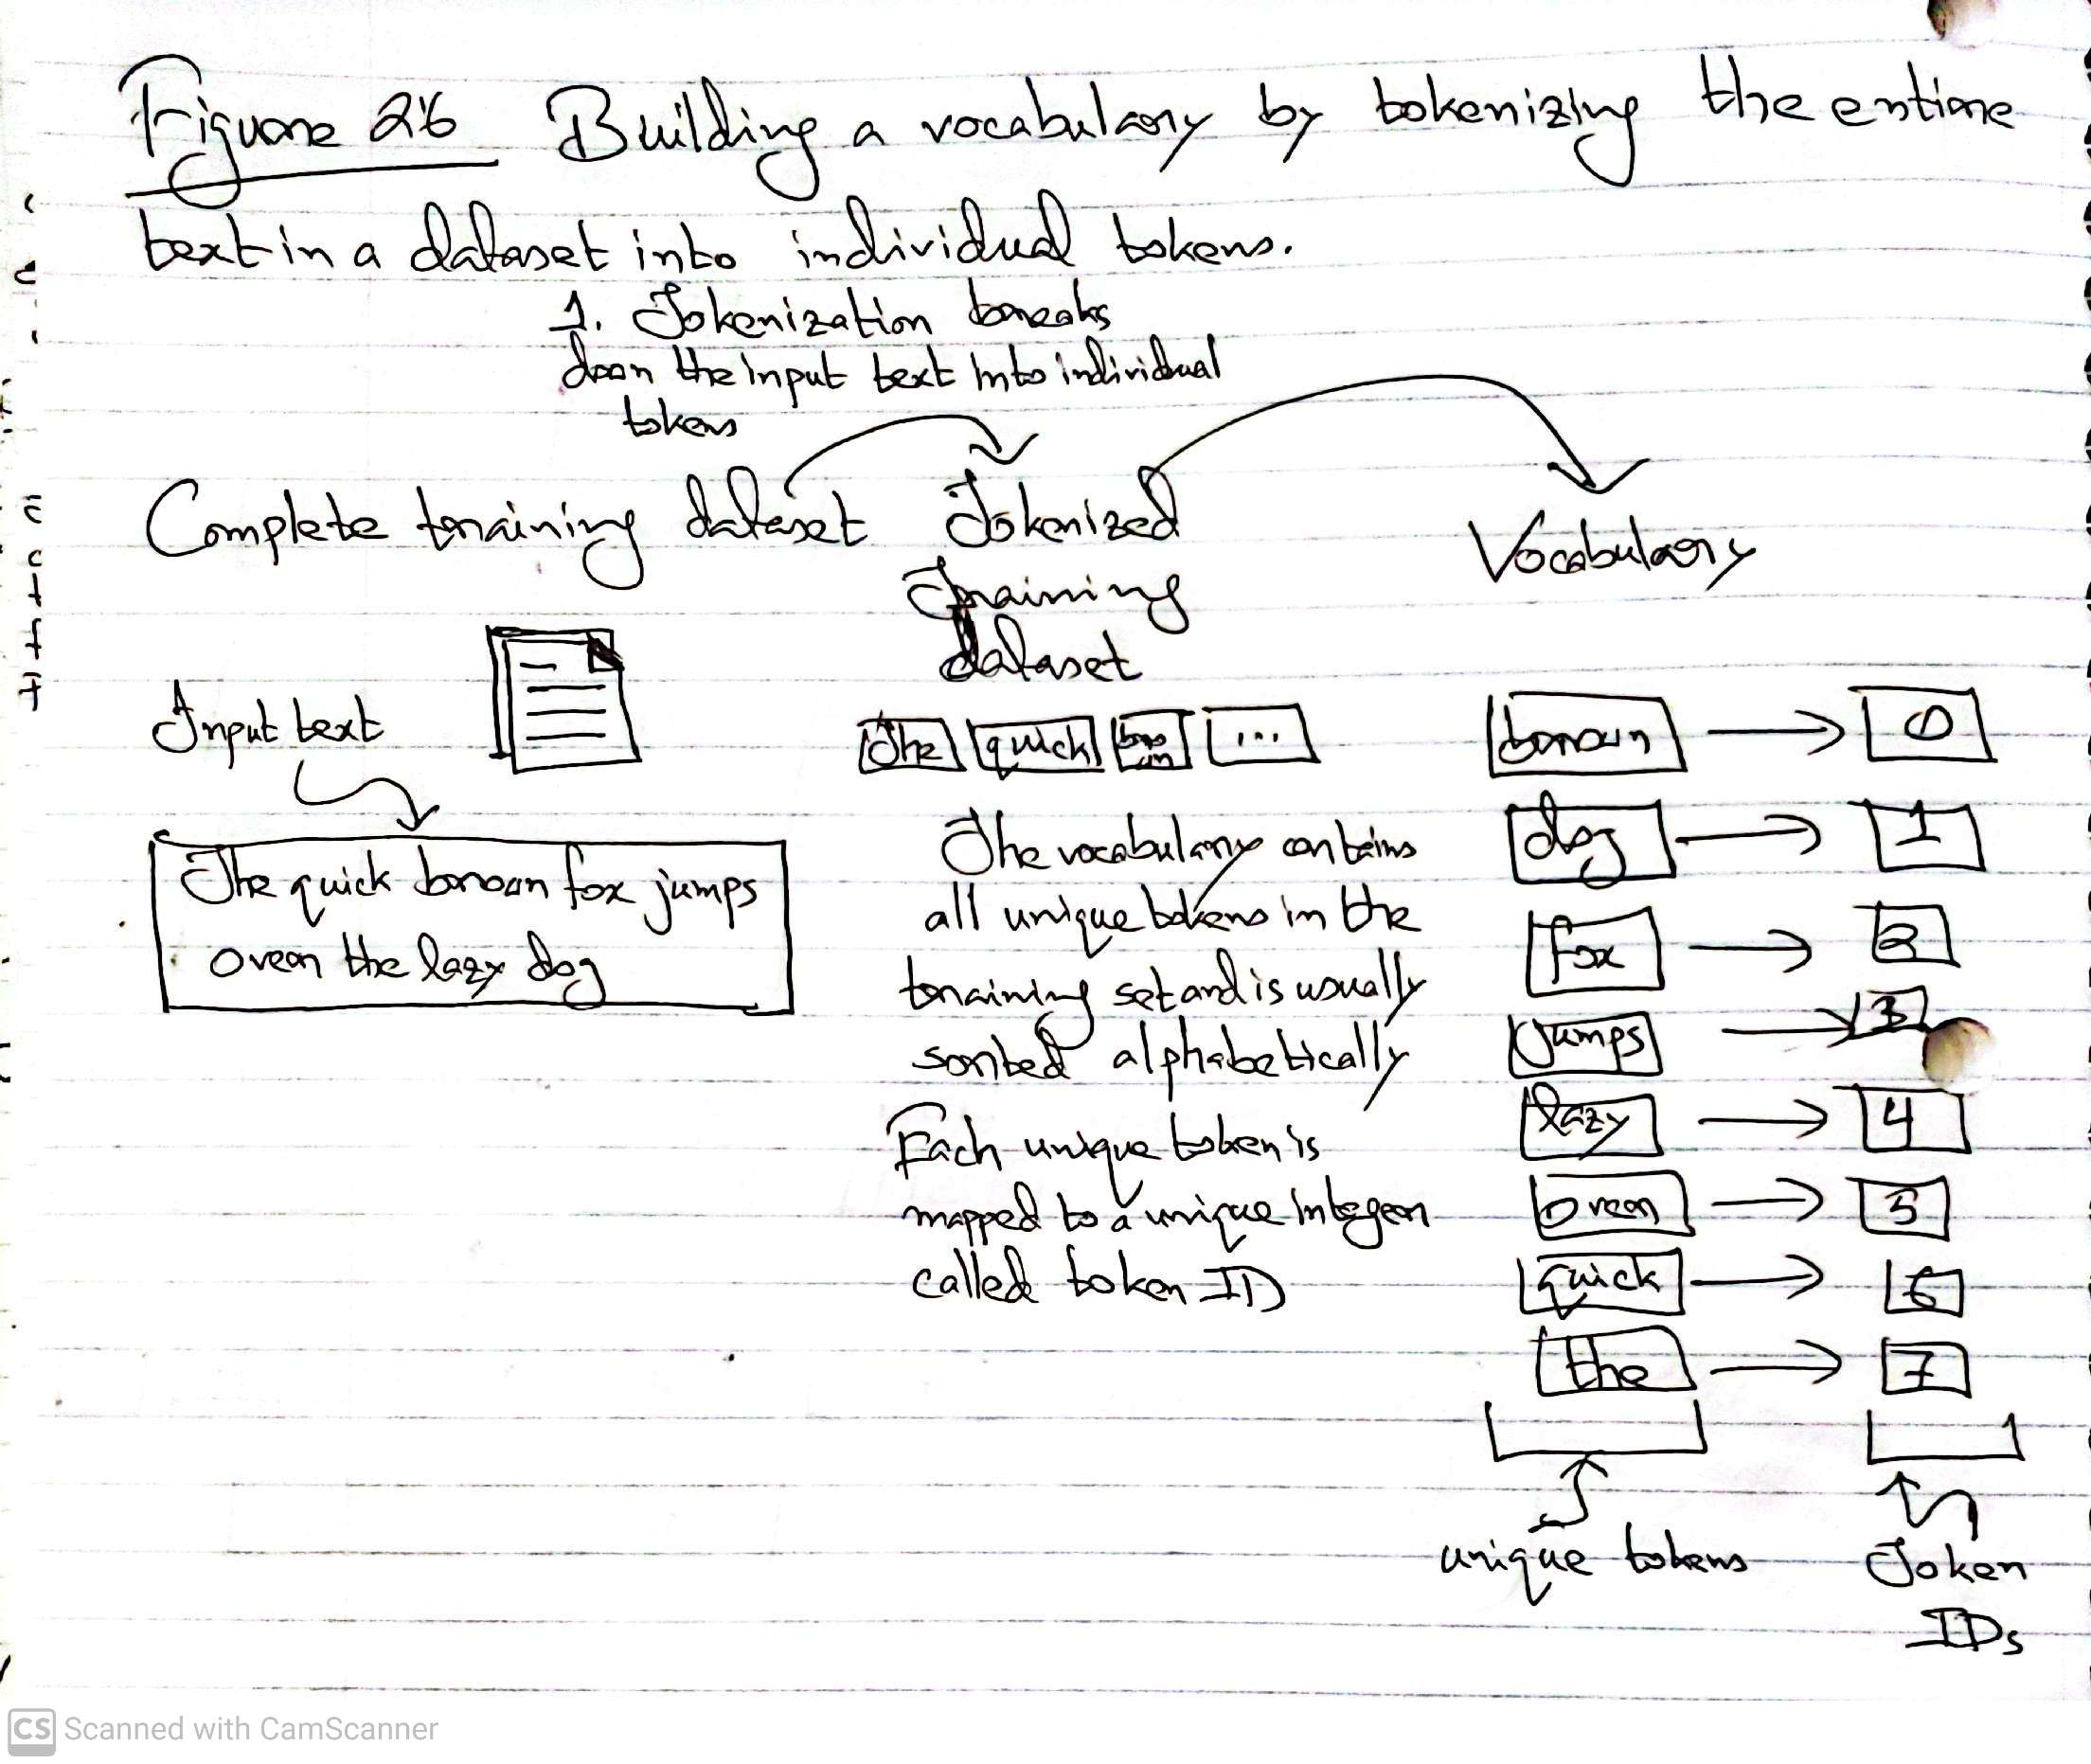

In [ ]:
display(Image(filename='2_6.jpg', width=800))

This process, from raw text to tokens, then to token IDs, is a foundational step in natural language processing pipelines, preparing the data for the next stage: converting token IDs into continuous embedding vectors that capture semantic information for model training.

The variable `preprocessed` has all the tokenized values from the story. Now, we list the unique tokens and sort them alphabetically.

In [14]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(vocab_size)

1130


In [15]:
type(all_words)

list

In [17]:
all_words[0:16]

['!',
 '"',
 "'",
 '(',
 ')',
 ',',
 '--',
 '.',
 ':',
 ';',
 '?',
 'A',
 'Ah',
 'Among',
 'And',
 'Are']

Now, let's create the **vocabulary**.

In [18]:
vocab = {token:integer for integer, token in enumerate(all_words)}
# Print the first 51 items
for i, item in enumerate(vocab.items()):
  print(item)
  if i >= 50:
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


We build the vocabulary from the complete training set and it can be applied to both the training set and to new text samples.

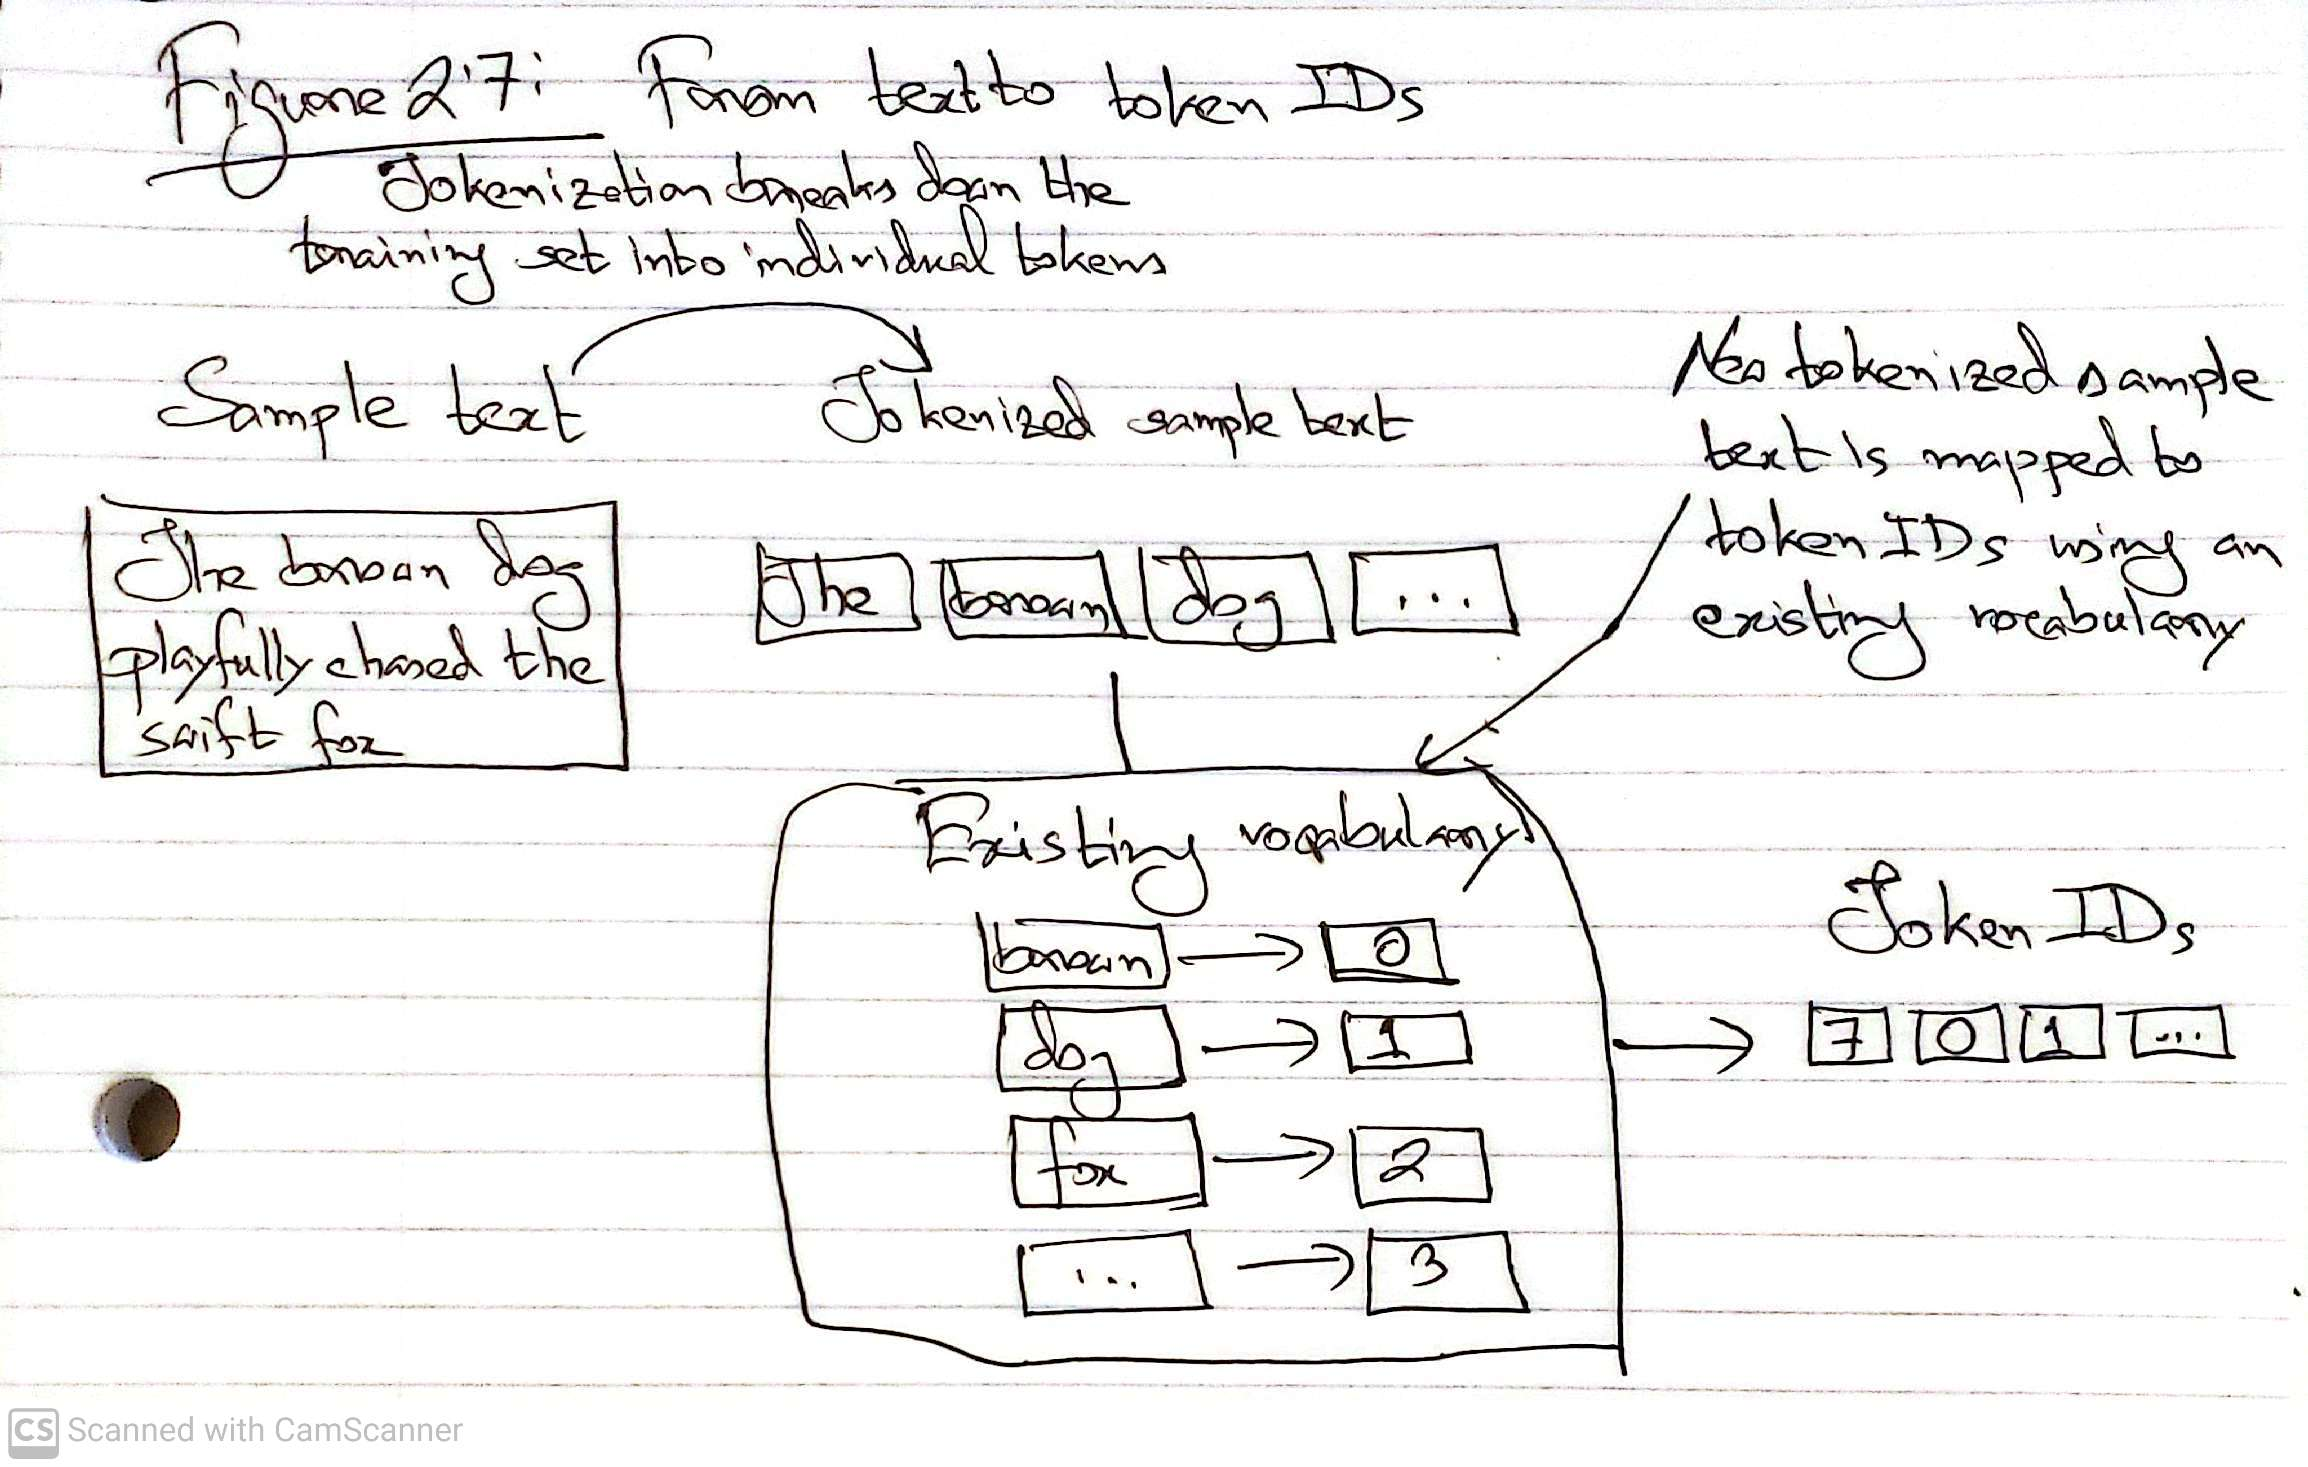

In [ ]:
display(Image(filename='2_7.jpg', width=800))

Also we want to convert the outputs of an LLM from numbers back into text, or we want to go from token IDs back to text. We can do this by creating an inverse version of the vocabulary.

Here we will use the term `encode` to go from text to token IDs and the term `decode` to refer to the process of going from token IDs back to the text itself. Now, we will implement a simple text tokenizer with both `encode` and `decode` methods.

###  Implementing a simple text tokenizer

In [19]:
# Define a class for a simple tokenizer.
class SimpleTokenizerV1:
    def __init__(self, vocab):
        """
        Initializes the tokenizer with a vocabulary.
        - `vocab`: A dictionary where keys are words or tokens (strings),
          and values are their corresponding integer IDs.
        """
        self.str_to_int = vocab  # Map from string tokens to integer IDs.
        # Create a reverse mapping from integer IDs to string tokens.
        self.int_to_str = {i: s for s, i in vocab.items()}

    def encode(self, text):
        """
        Encodes a text string into a list of integer IDs.
        - `text`: The input text to be tokenized and converted into IDs.
        """
        # Step 1: Preprocess the input text by splitting it into tokens.
        # Use `re.split` with the pattern `r'([,.?_!"()\']|--|\s)`:
        # - `[,.?_!"()\']`: Matches single-character punctuation.
        # - `--`: Matches the double-hyphen sequence.
        # - `\s`: Matches any whitespace (space, tab, newline).
        # - `()` ensures the matched tokens are included in the output list.
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)

        # Step 2: Clean up the tokens.
        # - `item.strip()`: Removes leading/trailing whitespace from each token.
        # - `if item.strip()`: Filters out empty strings or purely whitespace tokens.
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]

        # Step 3: Convert the cleaned tokens into integer IDs using the vocabulary.
        # - `self.str_to_int[s]`: Looks up the ID for each token `s` in the vocabulary.
        ids = [self.str_to_int[s] for s in preprocessed]

        return ids  # Return the list of integer IDs.

    def decode(self, ids):
        """
        Decodes a list of integer IDs back into a text string.
        - `ids`: The input list of integer IDs to be converted back to text.
        """
        # Step 1: Convert IDs back into their corresponding tokens using the reverse vocabulary.
        # - `self.int_to_str[i]`: Looks up the token for each ID `i`.
        text = " ".join([self.int_to_str[i] for i in ids])

        # Step 2: Postprocess the text to fix spacing around punctuation.
        # Use `re.sub` with the pattern `r'\s+([,.?!"()\'])'`:
        # - `\s+`: Matches one or more whitespace characters.
        # - `([,.?!"()\'])`: Matches punctuation that should not have spaces before it.
        # Replace matched patterns with `\1`, which removes the leading whitespace.
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)

        return text  # Return the final decoded text.

# Explanation of key parts:

# 1. **Vocabulary Initialization:**
#    - `self.str_to_int`: Maps tokens to integer IDs for efficient encoding.
#    - `self.int_to_str`: Reverse mapping from integer IDs to tokens for decoding.

# 2. **Tokenization (Encode):**
#    - The `re.split` pattern ensures splitting on punctuation, whitespace, and special sequences like `--`.
#    - Cleaning the result removes unnecessary whitespace or empty tokens.
#    - Vocabulary lookup translates each token into an integer ID.

# 3. **Detokenization (Decode):**
#    - Integer IDs are mapped back to tokens using `self.int_to_str`.
#    - Tokens are joined with spaces to form the initial text structure.
#    - `re.sub` fixes spacing issues, ensuring punctuation like commas and periods are correctly attached to preceding words.

# Example Usage:
# ```python
# vocab = {"Hello": 1, ",": 2, "world": 3, ".": 4}
# tokenizer = SimpleTokenizerV1(vocab)
# text = "Hello, world."
# encoded = tokenizer.encode(text)  # [1, 2, 3, 4]
# decoded = tokenizer.decode(encoded)  # "Hello, world."
# ```
# This explanation ensures beginners can understand both how the code works and why specific patterns and techniques are used.


##### **What does the code below in decode method do and how does it work?**

```python
text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
```

##### **What Does It Do?**
This line removes unnecessary spaces before certain punctuation marks in the text. It uses a regular expression with re.sub, which finds patterns in the text and replaces them with something else.

###### **Components of the Regular Expression:**

1. `\s+`:

  - Matches **one or more whitespace characters** (e.g., spaces, tabs, newlines).
  - Example: `"   "` (3 spaces) or `" "` (1 space).

2. `([,.?!"()\'])`:

  - Matches any one of these punctuation marks: `, . ? ! " ( ) '`.
  - The parentheses `()` make this part a capturing group, meaning it can be referred to later.

3. `r'\1'`:

  - Refers to **the first capturing group** (the punctuation matched by `([,.?!"()\']))`.
  - This ensures that the matched punctuation is kept in the text, but the preceding whitespace is removed.

###### **How Does It Work?**
- It looks for spaces (**\s+**) before the punctuation marks in the capturing group.
- It removes those spaces while keeping the punctuation.

###### **Example 1: Removing Space Before a Comma**
Input text:

```python
text = "Hello , world ."
```
1. The pattern finds `\s+` (the space) before `,` and `.`.
  - Matches: `" ,"` and `" ."`
2. Replaces `" ,"` with `","` and `" ."` with `"."`.

Result:

```python
"Hello, world."
```

###### **Example 2: Removing Space Before a Question Mark**
Input text:

```python
text = "Is this ? A test !"
```
1. The pattern finds spaces before ? and !.
Matches: `" ?"` and `" !"`
2. Replaces `" ?"` with `"?"` and `" !"` with `"!"`.

Result:

```python
"Is this? A test!"
```

In [ ]:
text = "Hello ( world ) ."
text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
print(text)

Hello( world).


Now, we can create a new tokenizer object using the `SimpleTokenizerV1` class and tokenize texts. We will use the “The Verdict” short story by Edith Wharton that we already downloaded and turned into a dictionary contained in the variable `vocab`.

In [20]:
tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know,"
       Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [21]:
print(tokenizer.decode(ids))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


To point out the shortcoming with this tokenizer made out of the small text, if we use this tokenizer with a new text sample and if any of the words was not in the training set (vocabulary), we will get error.

In [22]:
text = "Hello, how is the tea, Good or Bad?"
print(tokenizer.encode(text))

KeyError: 'Hello'

As the word **"Hello"** was not used in the “The Verdict” short story and so it was not in the `vocabulary` and this causes an error. This is why we need large and diverse training sets for effective LLM.

### Adding special context tokens


We can customize the tokenizer to automatically substitute any word not found in its predefined vocabulary with a special <|unk|> token, ensuring that out-of-vocabulary terms are managed consistently during text processing. In natural language processing, such measures are essential for robust model performance, as they prevent the system from misinterpreting or ignoring rare or novel words.

In addition, it is advantageous to include a unique separator token between distinct segments of text. When training GPT-like language models on datasets composed of multiple independent documents or books, it is common practice to insert a dedicated token at the beginning of each new document or book. This approach clearly demarcates the boundaries between different text sources, signaling to the model that although the texts are concatenated into a single training sequence, they each originate from separate, unrelated contexts.

By implementing these tokenization strategies, the model not only handles unknown words more effectively but also gains a better understanding of the structural breaks within the training data. This results in improved context sensitivity, more coherent text generation, and enhanced performance in tasks that require the model to discern shifts in topic, style, or source material.

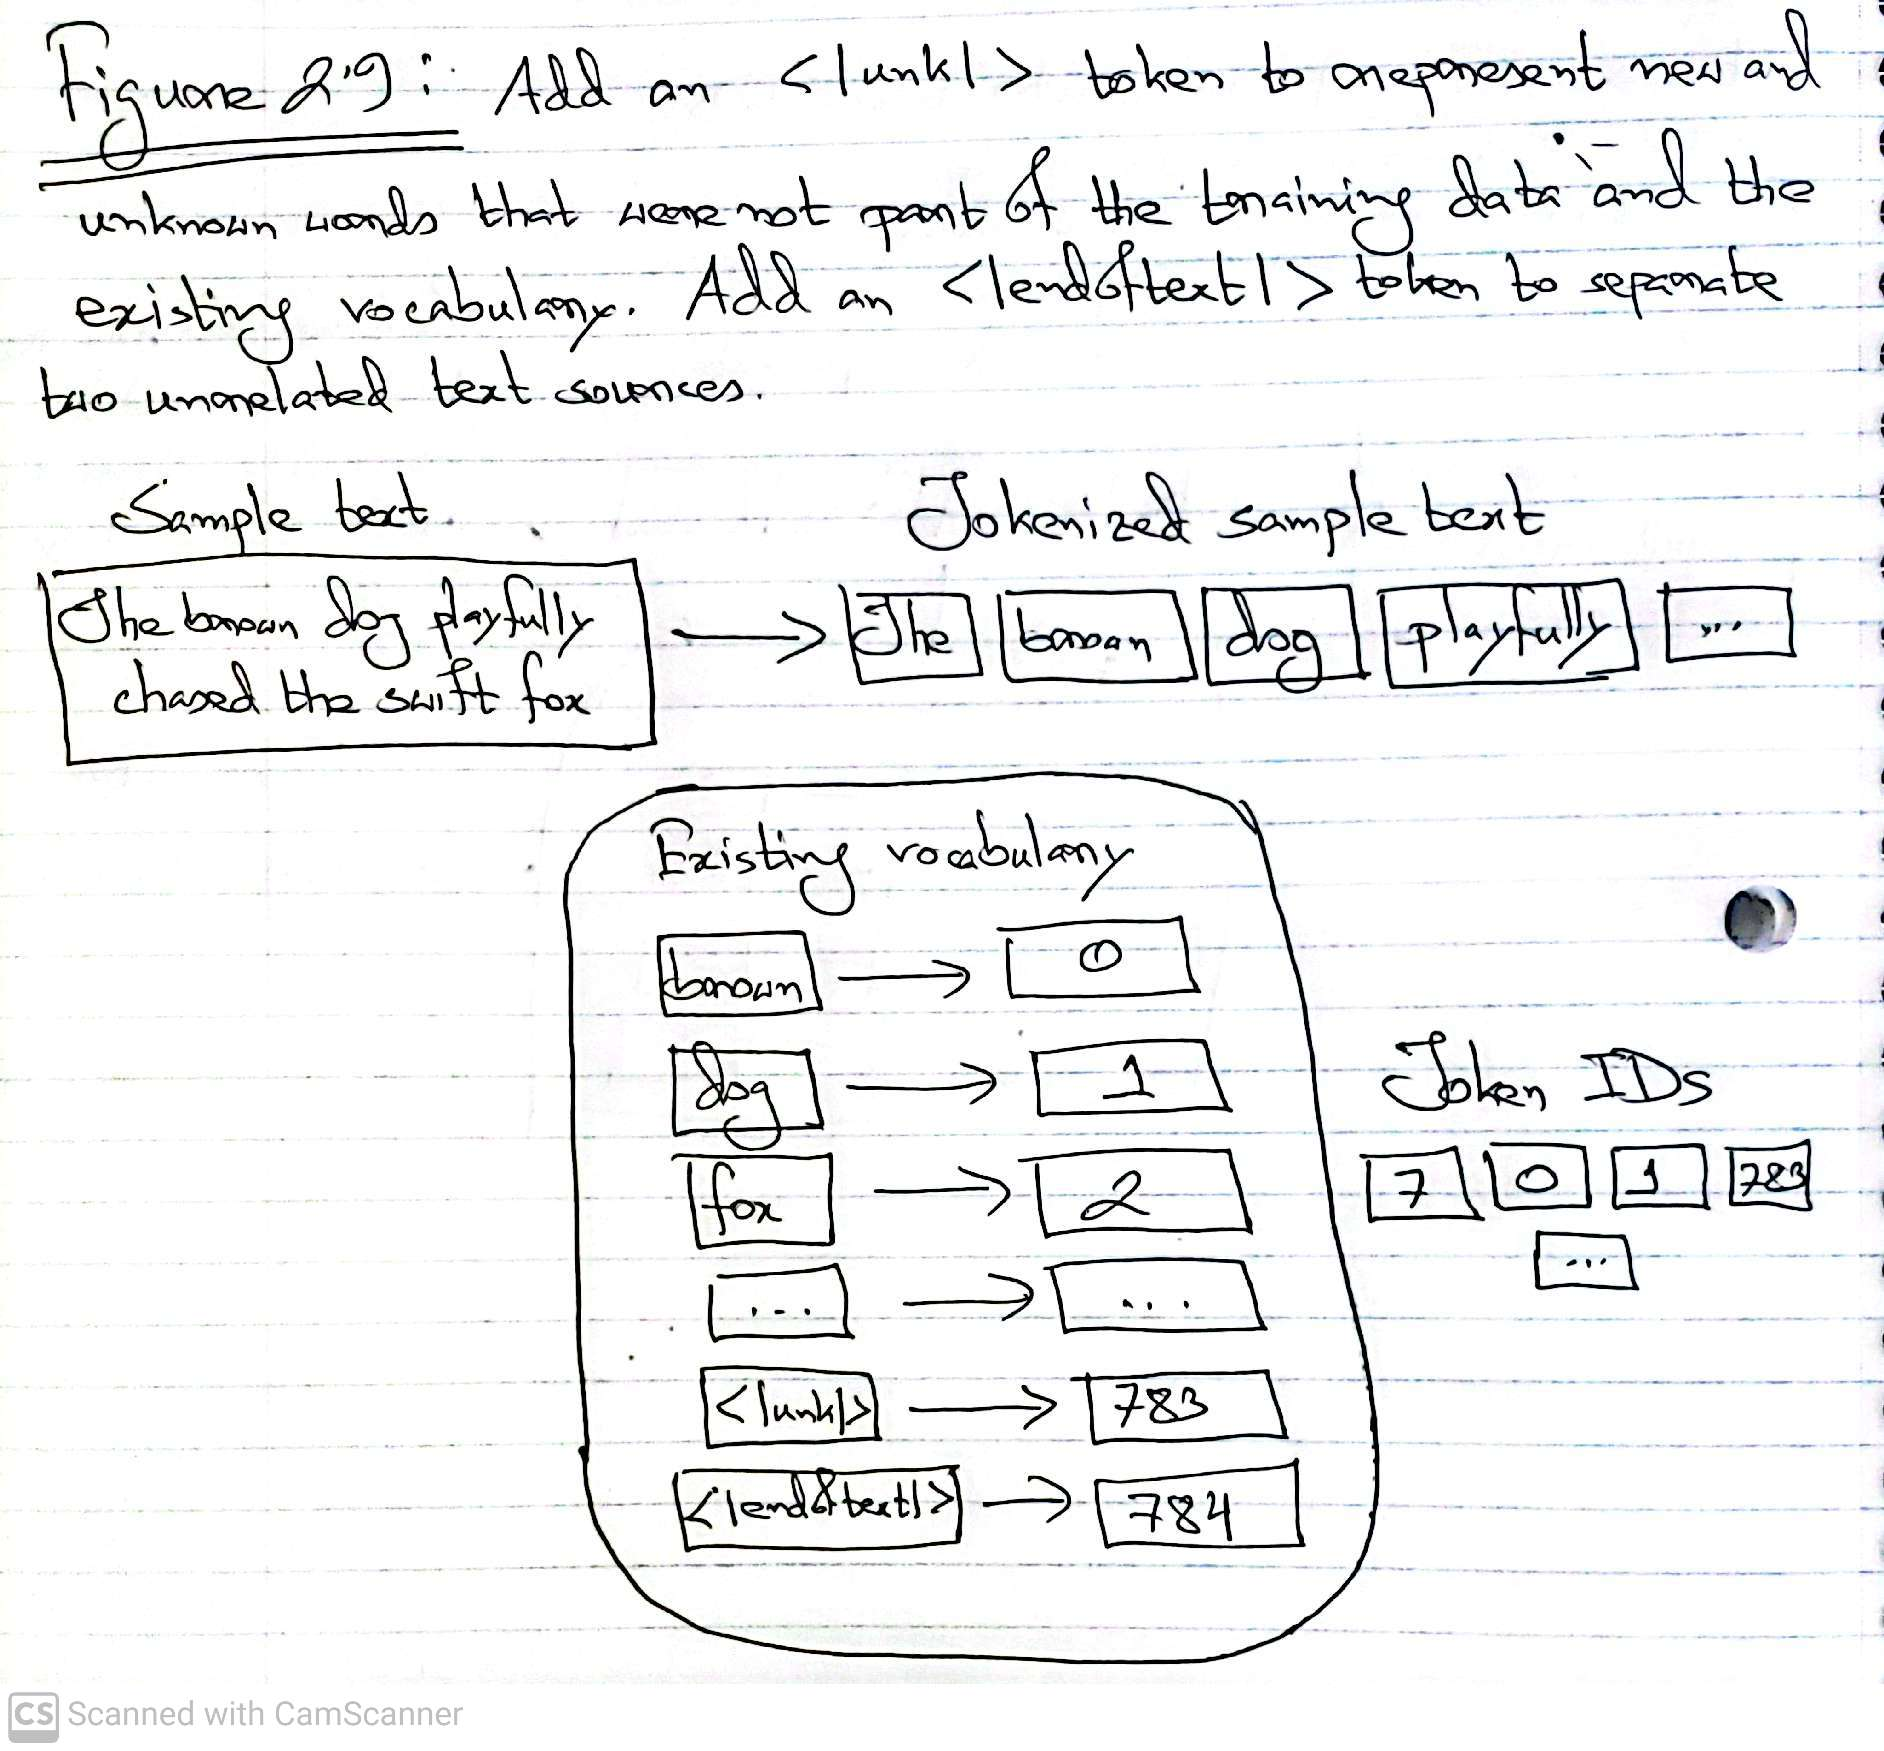

In [ ]:
display(Image(filename='2_9.jpg', width=800))

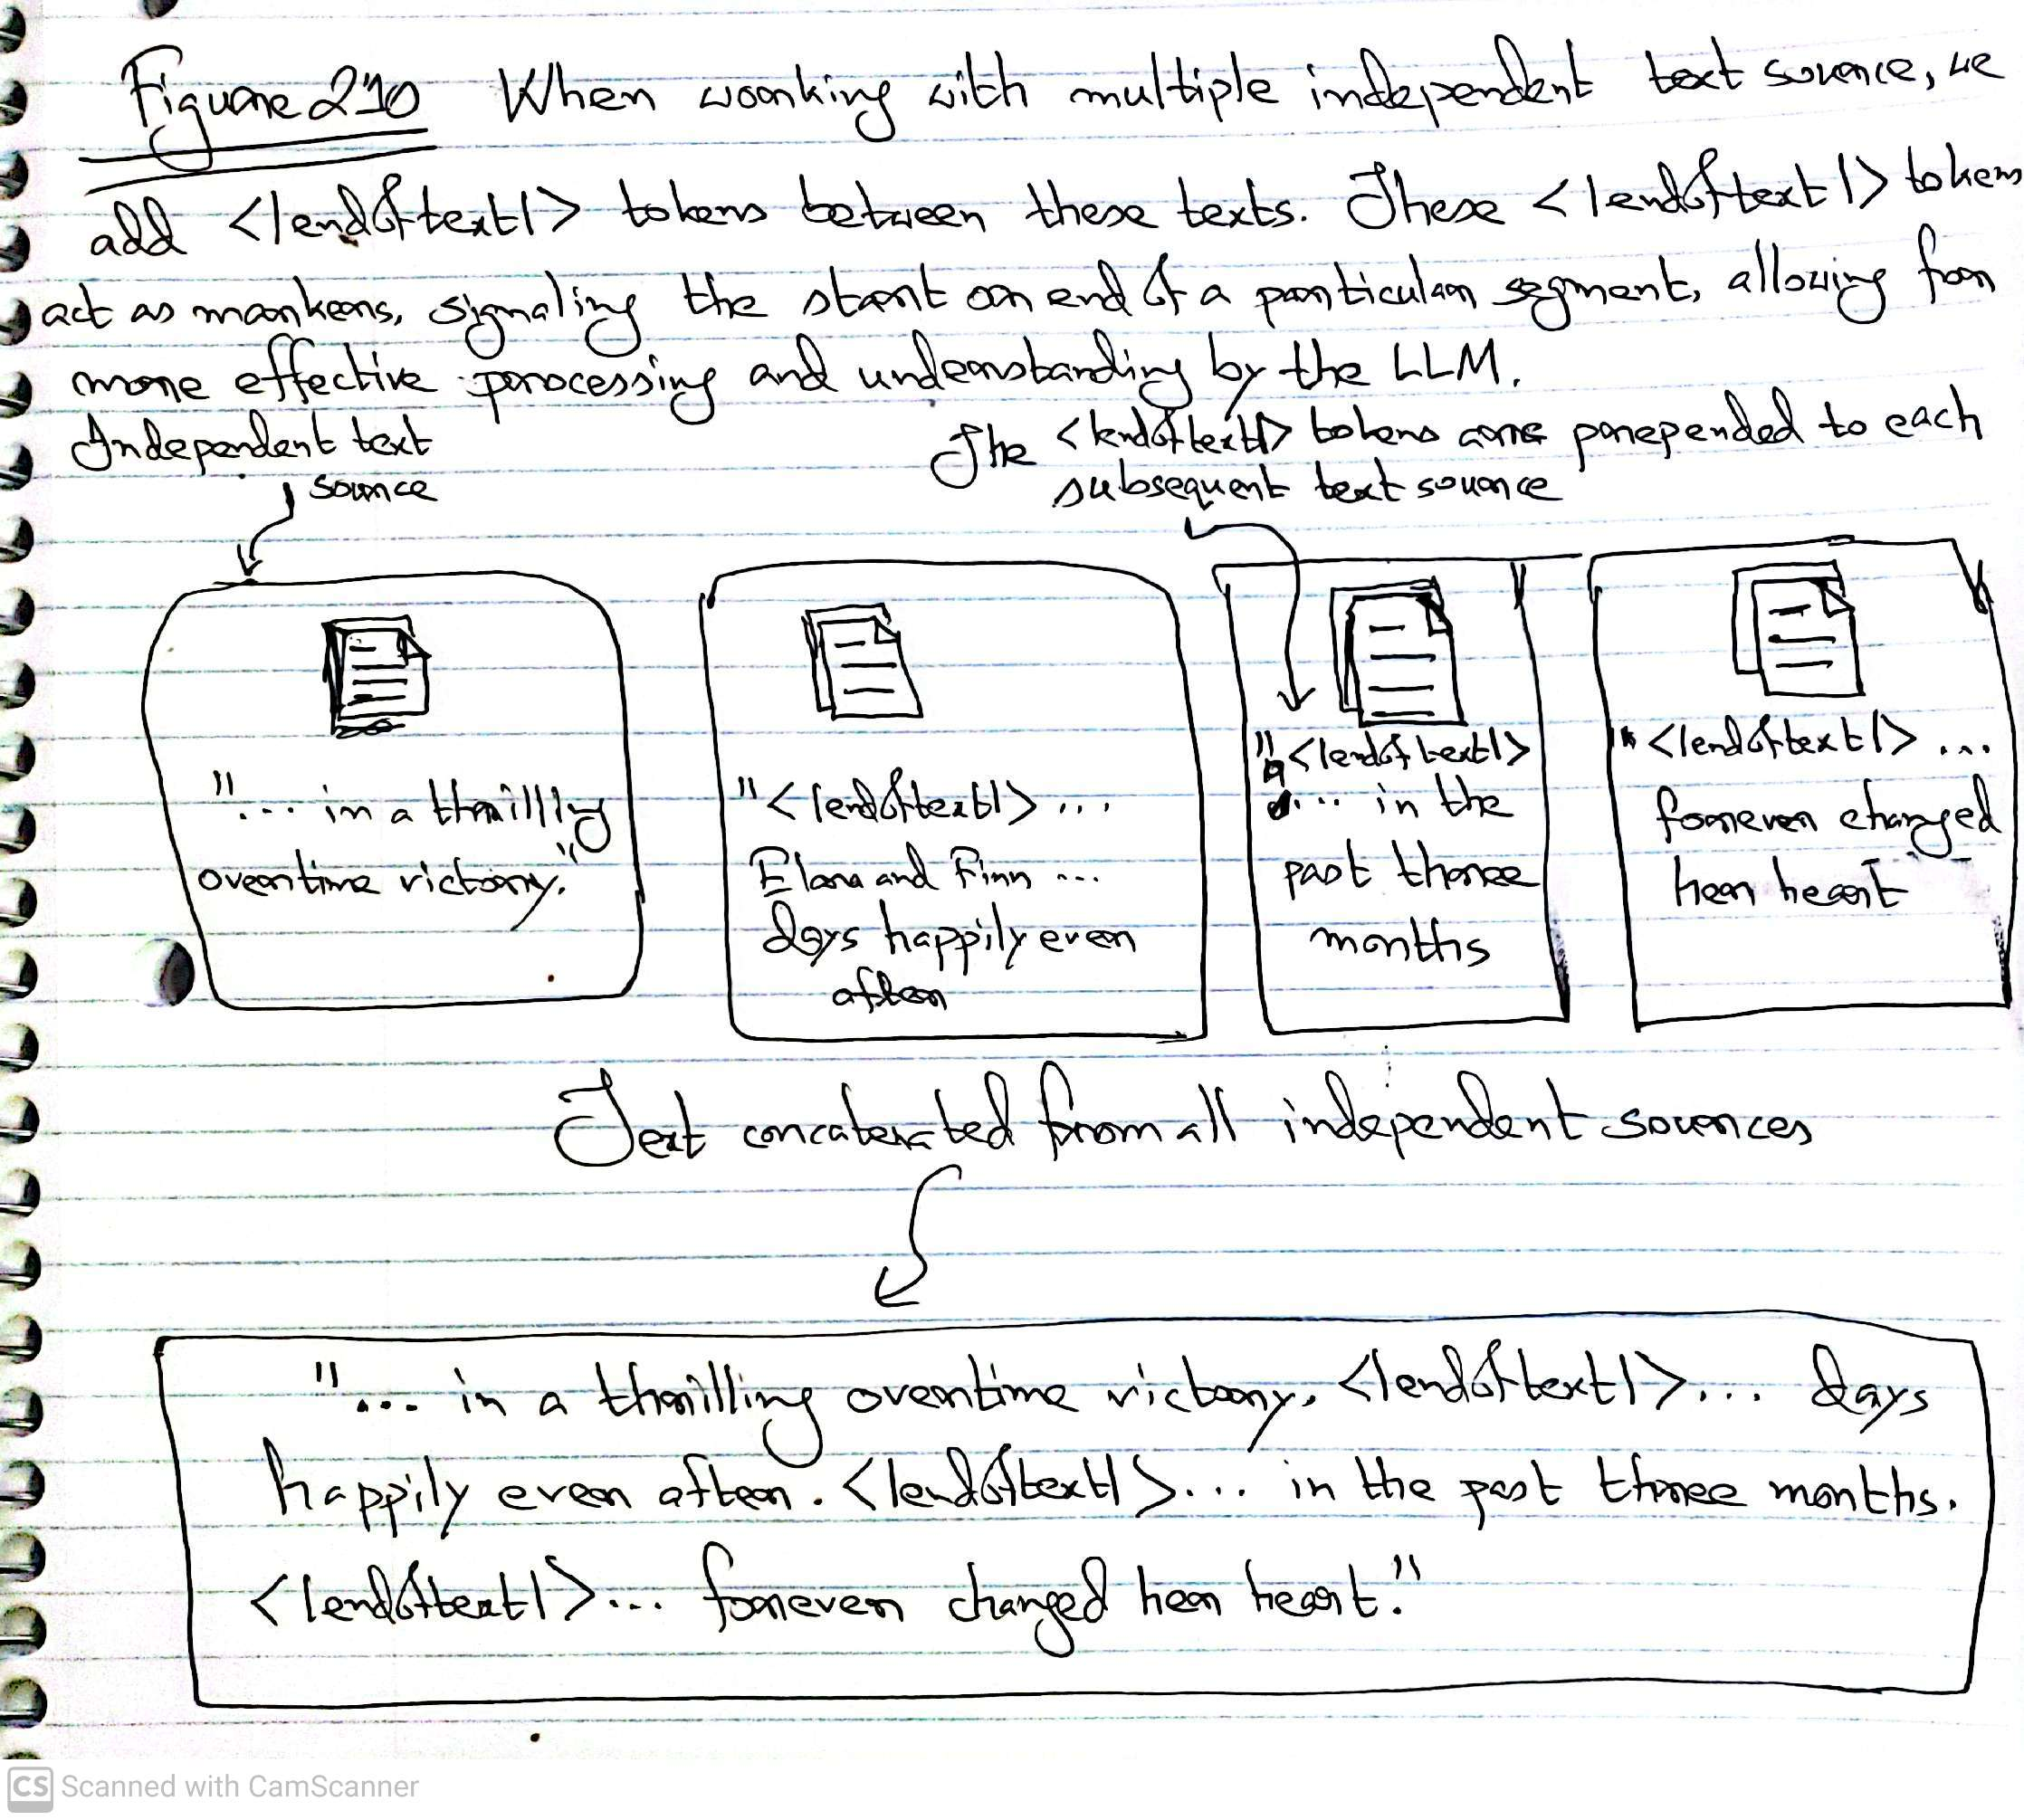

In [ ]:
display(Image(filename='2_10.jpg', width=800))

Now, we include these new tokens **"<|endoftext|>", "<|unk|>"** to the list of all tokens saved in the variable `preprocessed`.

In [23]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}

print(len(vocab.items()))

1132


In [24]:
for i, item in enumerate(list(vocab.items())[-5:]): # print the last 5 entries
  print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


#### Version 2 of the tokenizer addressing the unknown word issue

Now, we will create another tokenizer that will also address this unknown word issue. The `vocab` we are using here now already has **"<|endoftext|>", "<|unk|>"**.

In [25]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        preprocessed = [item if item in self.str_to_int
                        else "<|unk|>" for item in preprocessed]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])

        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [26]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [27]:
tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text))

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]


In [28]:
print(tokenizer.decode(tokenizer.encode(text)))

<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


Additional tokens are also considered by researchers:

- `[BOS]` (beginning of sequence) - Signfies where a piece of content begins

- `[EOS]` (end of sequence) - Signifies the end of text from onw book or article before the addition from another book or article.

- `[PAD]` - With batch size larger than one, different batches might have different or varying lengths. To ensure that all texts have the same length, `[PAD]` tokens are added with shorter texts up to the length of the longest text in the batch.

The tokenizer employed by GPT models does not rely on an `<|unk|>` token to handle words that fall outside its vocabulary. Instead, it utilizes a byte pair encoding (BPE) tokenizer, which breaks words down into smaller, more manageable subword units. This approach is particularly effective because it allows the model to construct unfamiliar words from frequently occurring subword segments, thereby mitigating the issue of out-of-vocabulary terms. By decomposing words into subword components, the model can capture common morphemes and patterns, which enhances its ability to generalize across diverse linguistic contexts. This strategy not only improves the robustness of text processing but also contributes to the overall fluency and accuracy in language generation, making GPT models more adept at handling a wide range of vocabulary and language variations.

### **Byte pair encoding**

### ChatGPT prompt:
"**What is Byte pair encoding? Please explain easily.**"


### ChatGPT Answer for the prompt:

**Byte Pair Encoding (BPE)** is a simple and effective method used for text compression and tokenization in natural language processing (NLP). Let me explain it in an easy way:

### What Does It Do?
BPE helps break down words into smaller parts (subwords or tokens) to make them easier to process. It finds common patterns in text, combines them into new tokens, and repeats this process. This helps reduce the size of the vocabulary while still being able to represent all words.

### How Does It Work?
1. Start with Characters:

  - Treat each character in the text as a separate token. For example, the word `banana` becomes `b`, `a`, `n`, `a`, `n`, `a`.

2. Count Pairs of Tokens:

  - Look for the most common pair of consecutive tokens (e.g., `a` and `n` in `banana`).

3. Merge the Most Frequent Pair:

  - Replace the most common pair with a single new token. For example:
    - `b`, `a`, `n`, `a`, `n`, `a` → `b`, `an`, `a`, `n`, `a`.

4. Repeat the Process:

  - Keep finding and merging the most frequent pairs. After another step:
    - `b`, `an`, `a`, `n`, `a` → `b`, `an`, `an`, `a`.
  - Eventually, the word could be tokenized as `b`, `anan`, `a`.

5. Stop When Reaching a Limit:

  - Stop merging pairs once you reach a predefined vocabulary size or when no more pairs are frequent.

### **Why Is It Useful?**

  - Flexible Vocabulary: BPE can handle rare or unknown words by splitting them into meaningful subwords (e.g., `unbreakable` → `un`, `break`, `able`).
  - Efficient Storage: It reduces the vocabulary size, which makes models faster and requires less memory.
  - Improved Performance: Works well for languages with complex word structures, like Turkish or Finnish, where words can have many variations.

### **Example in Action:**
Suppose we have the sentence:

```Python
low, lower, lowest
```

1. Start with individual characters: `l`, `o`, `w`, `,`, `l`, `o`, `w`, `e`, `r`, ...
2. Find the most frequent pair (`l, o`) and merge it to `lo`.
3. Continue merging pairs like `lo` and `w` → `low`.

After a few steps, you'll have a compact representation of the text using subwords like `low`, `er`, `est`.

This technique is widely used in modern NLP models, such as GPT and BERT, to process text efficiently.

In [34]:
!pip install tiktoken

In [29]:
from importlib.metadata import version
import tiktoken
print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.11.0


####  Instantiate the BPE tokenizer from tiktoken

In [35]:
tokenizer = tiktoken.get_encoding("gpt2")

In [36]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [37]:
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [38]:
text = "Akwirw ier."
print(tokenizer.encode(text))

[33901, 86, 343, 86, 220, 959, 13]


In [39]:
print(tokenizer.decode(tokenizer.encode(text)))

Akwirw ier.


### Data sampling with a sliding window

Now, we will generate input-target pairs for training LLM. To oretrain LLM, we do next word prediction in a text.

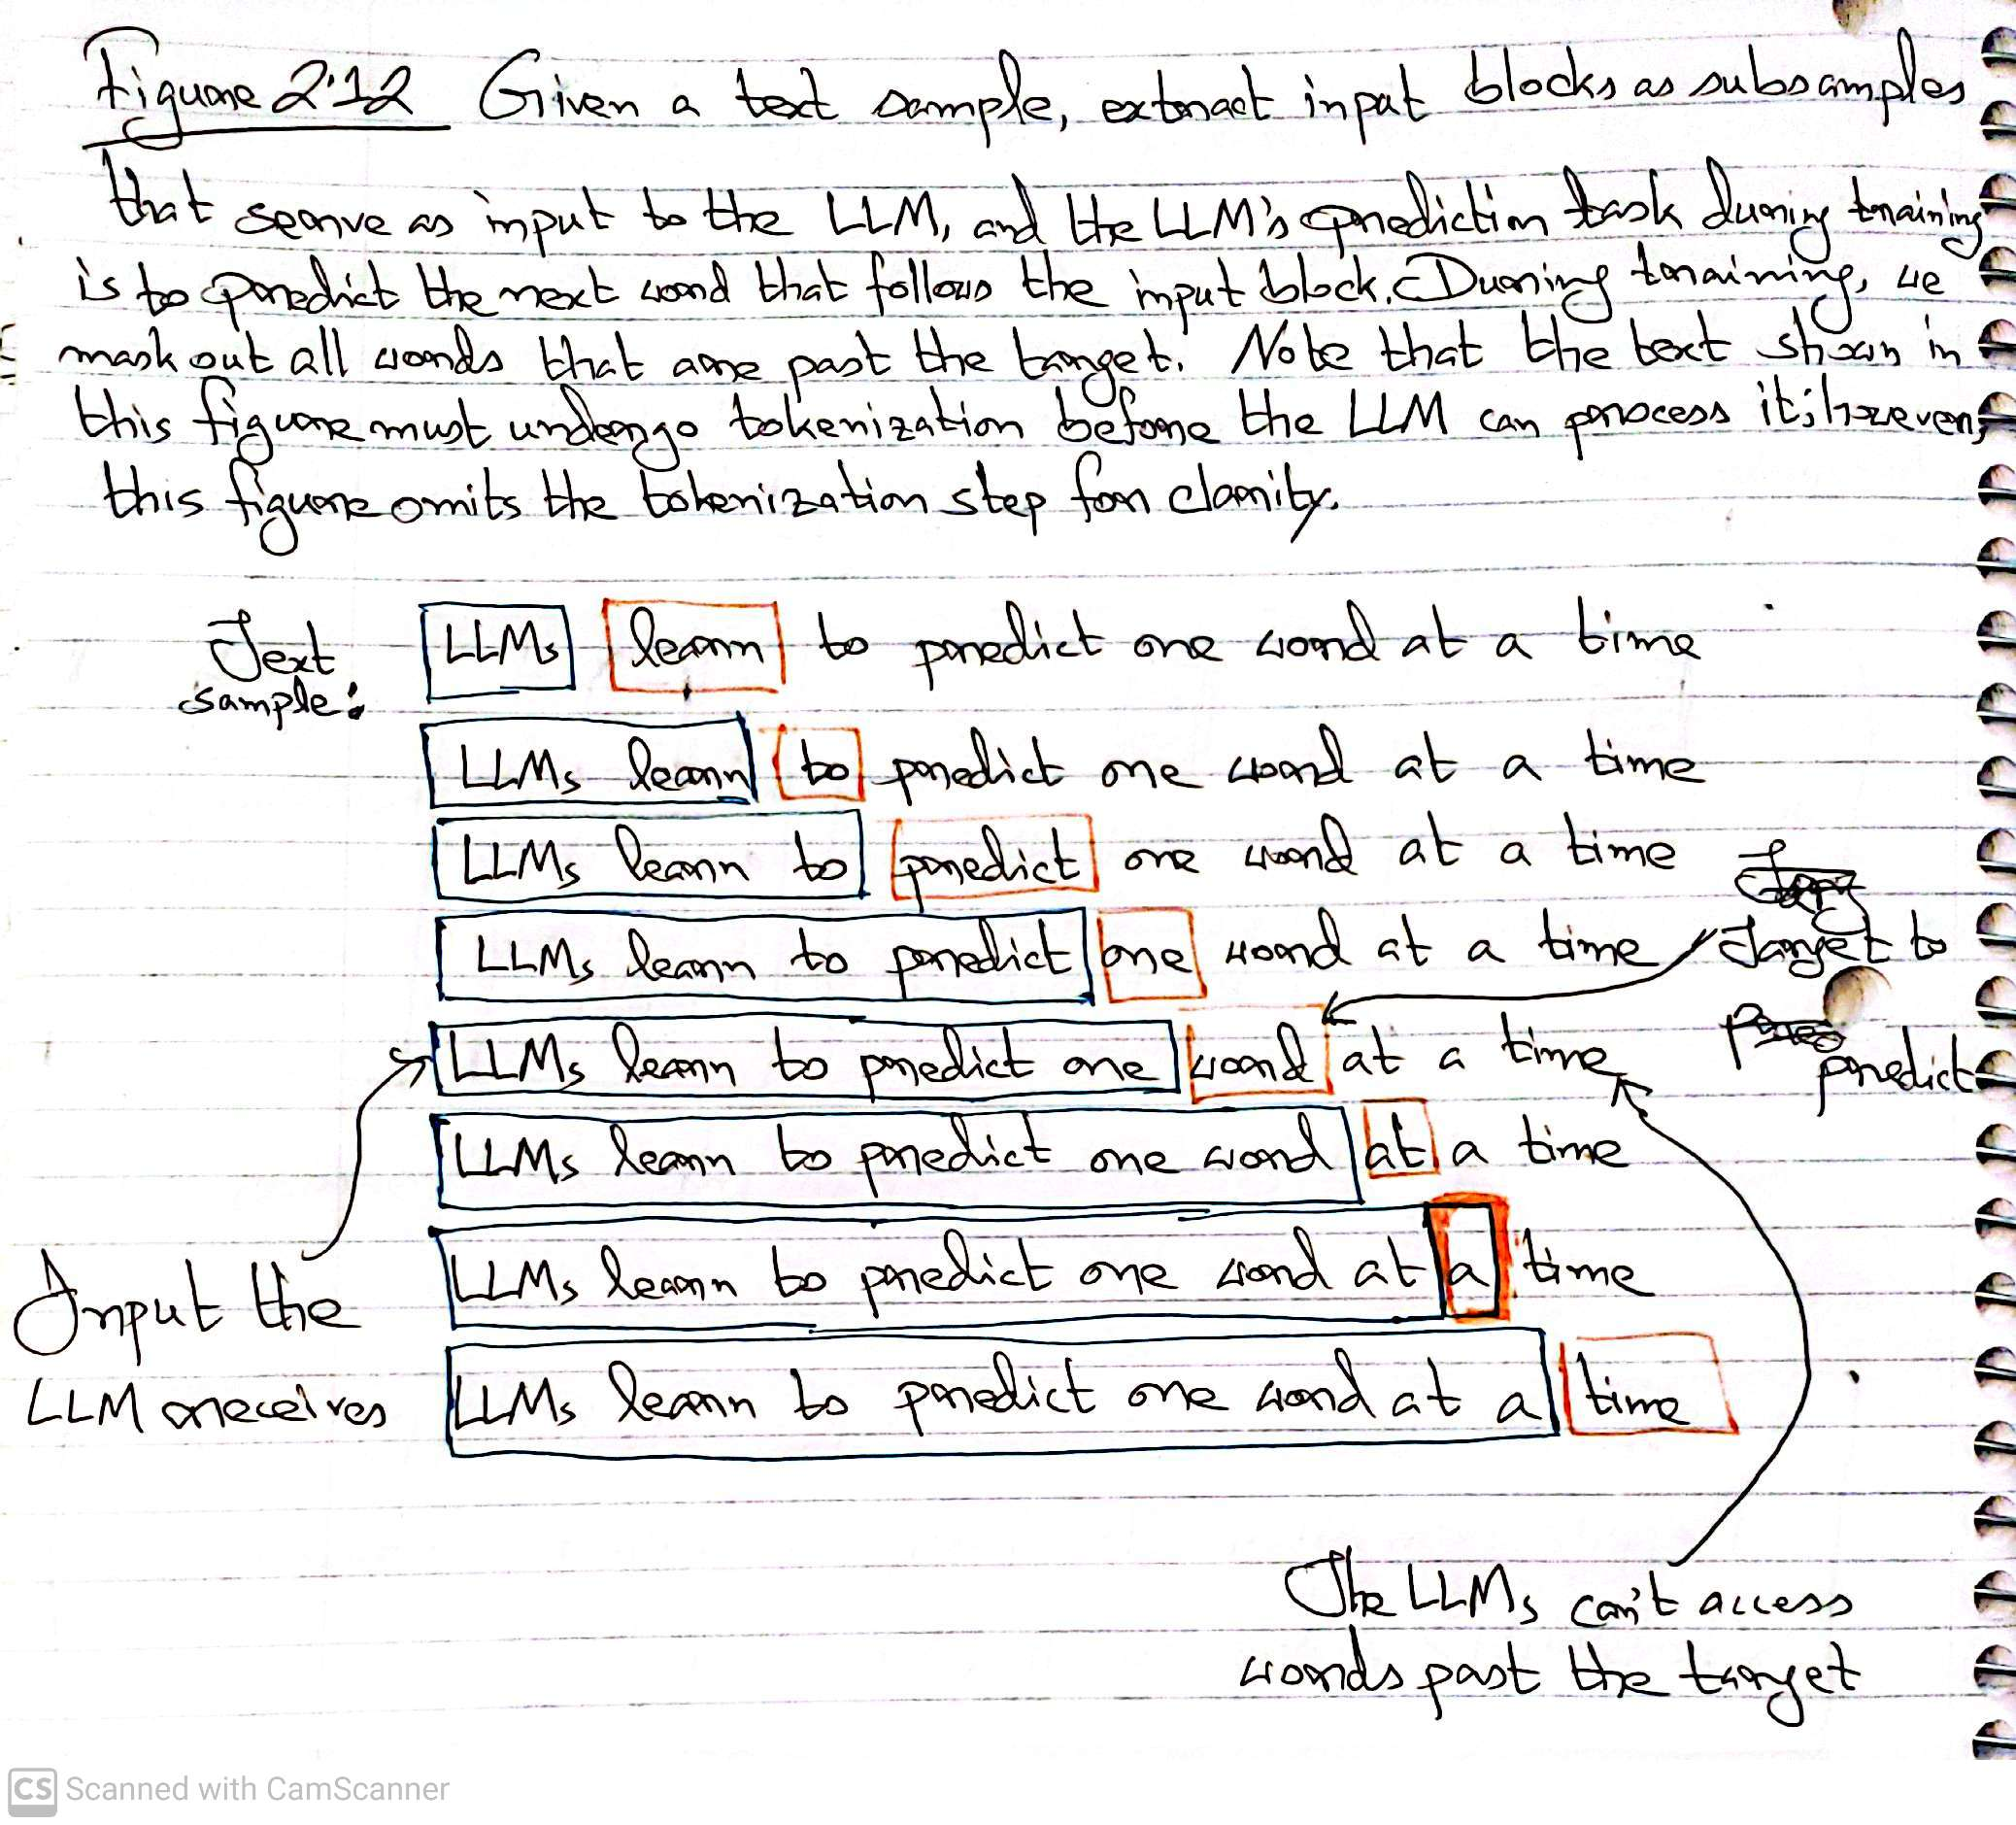

In [ ]:
display(Image(filename='2_12.jpg', width=800))

Now, we will implement a data loader that will get these input-target pairs as shown in the figure above using a **sliding window** approach.

First, we tokenize the "The Verdict" story.

In [40]:
with open(file_path, "r", encoding="utf-8") as f:
  raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [41]:
# for a slightly more interesting text passage in the next steps:
enc_sample = enc_text[50:]

In [ ]:
# enc_sample

Now, we create input-target pairs for next-word prediction task where x contains the input tokens and the targets where the inputs are shifted by 1.

In [42]:
context_size = 4
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y: {y}")

x: [290, 4920, 2241, 287]
y: [4920, 2241, 287, 257]


In [43]:
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]
  print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [44]:
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]
  print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))
# The tokenizer.decode() function expects a list (or an iterable) of token IDs
# as input. It then decodes these token IDs into a string.

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


So, we have now created the input-target pairs that can be used for LLM training.

### **Dataset class**

Now, we need to implement an efficient data loader that can iterate over the input dataset and return the inputs and targets as PyTorch tensors. Look at the example figure below.

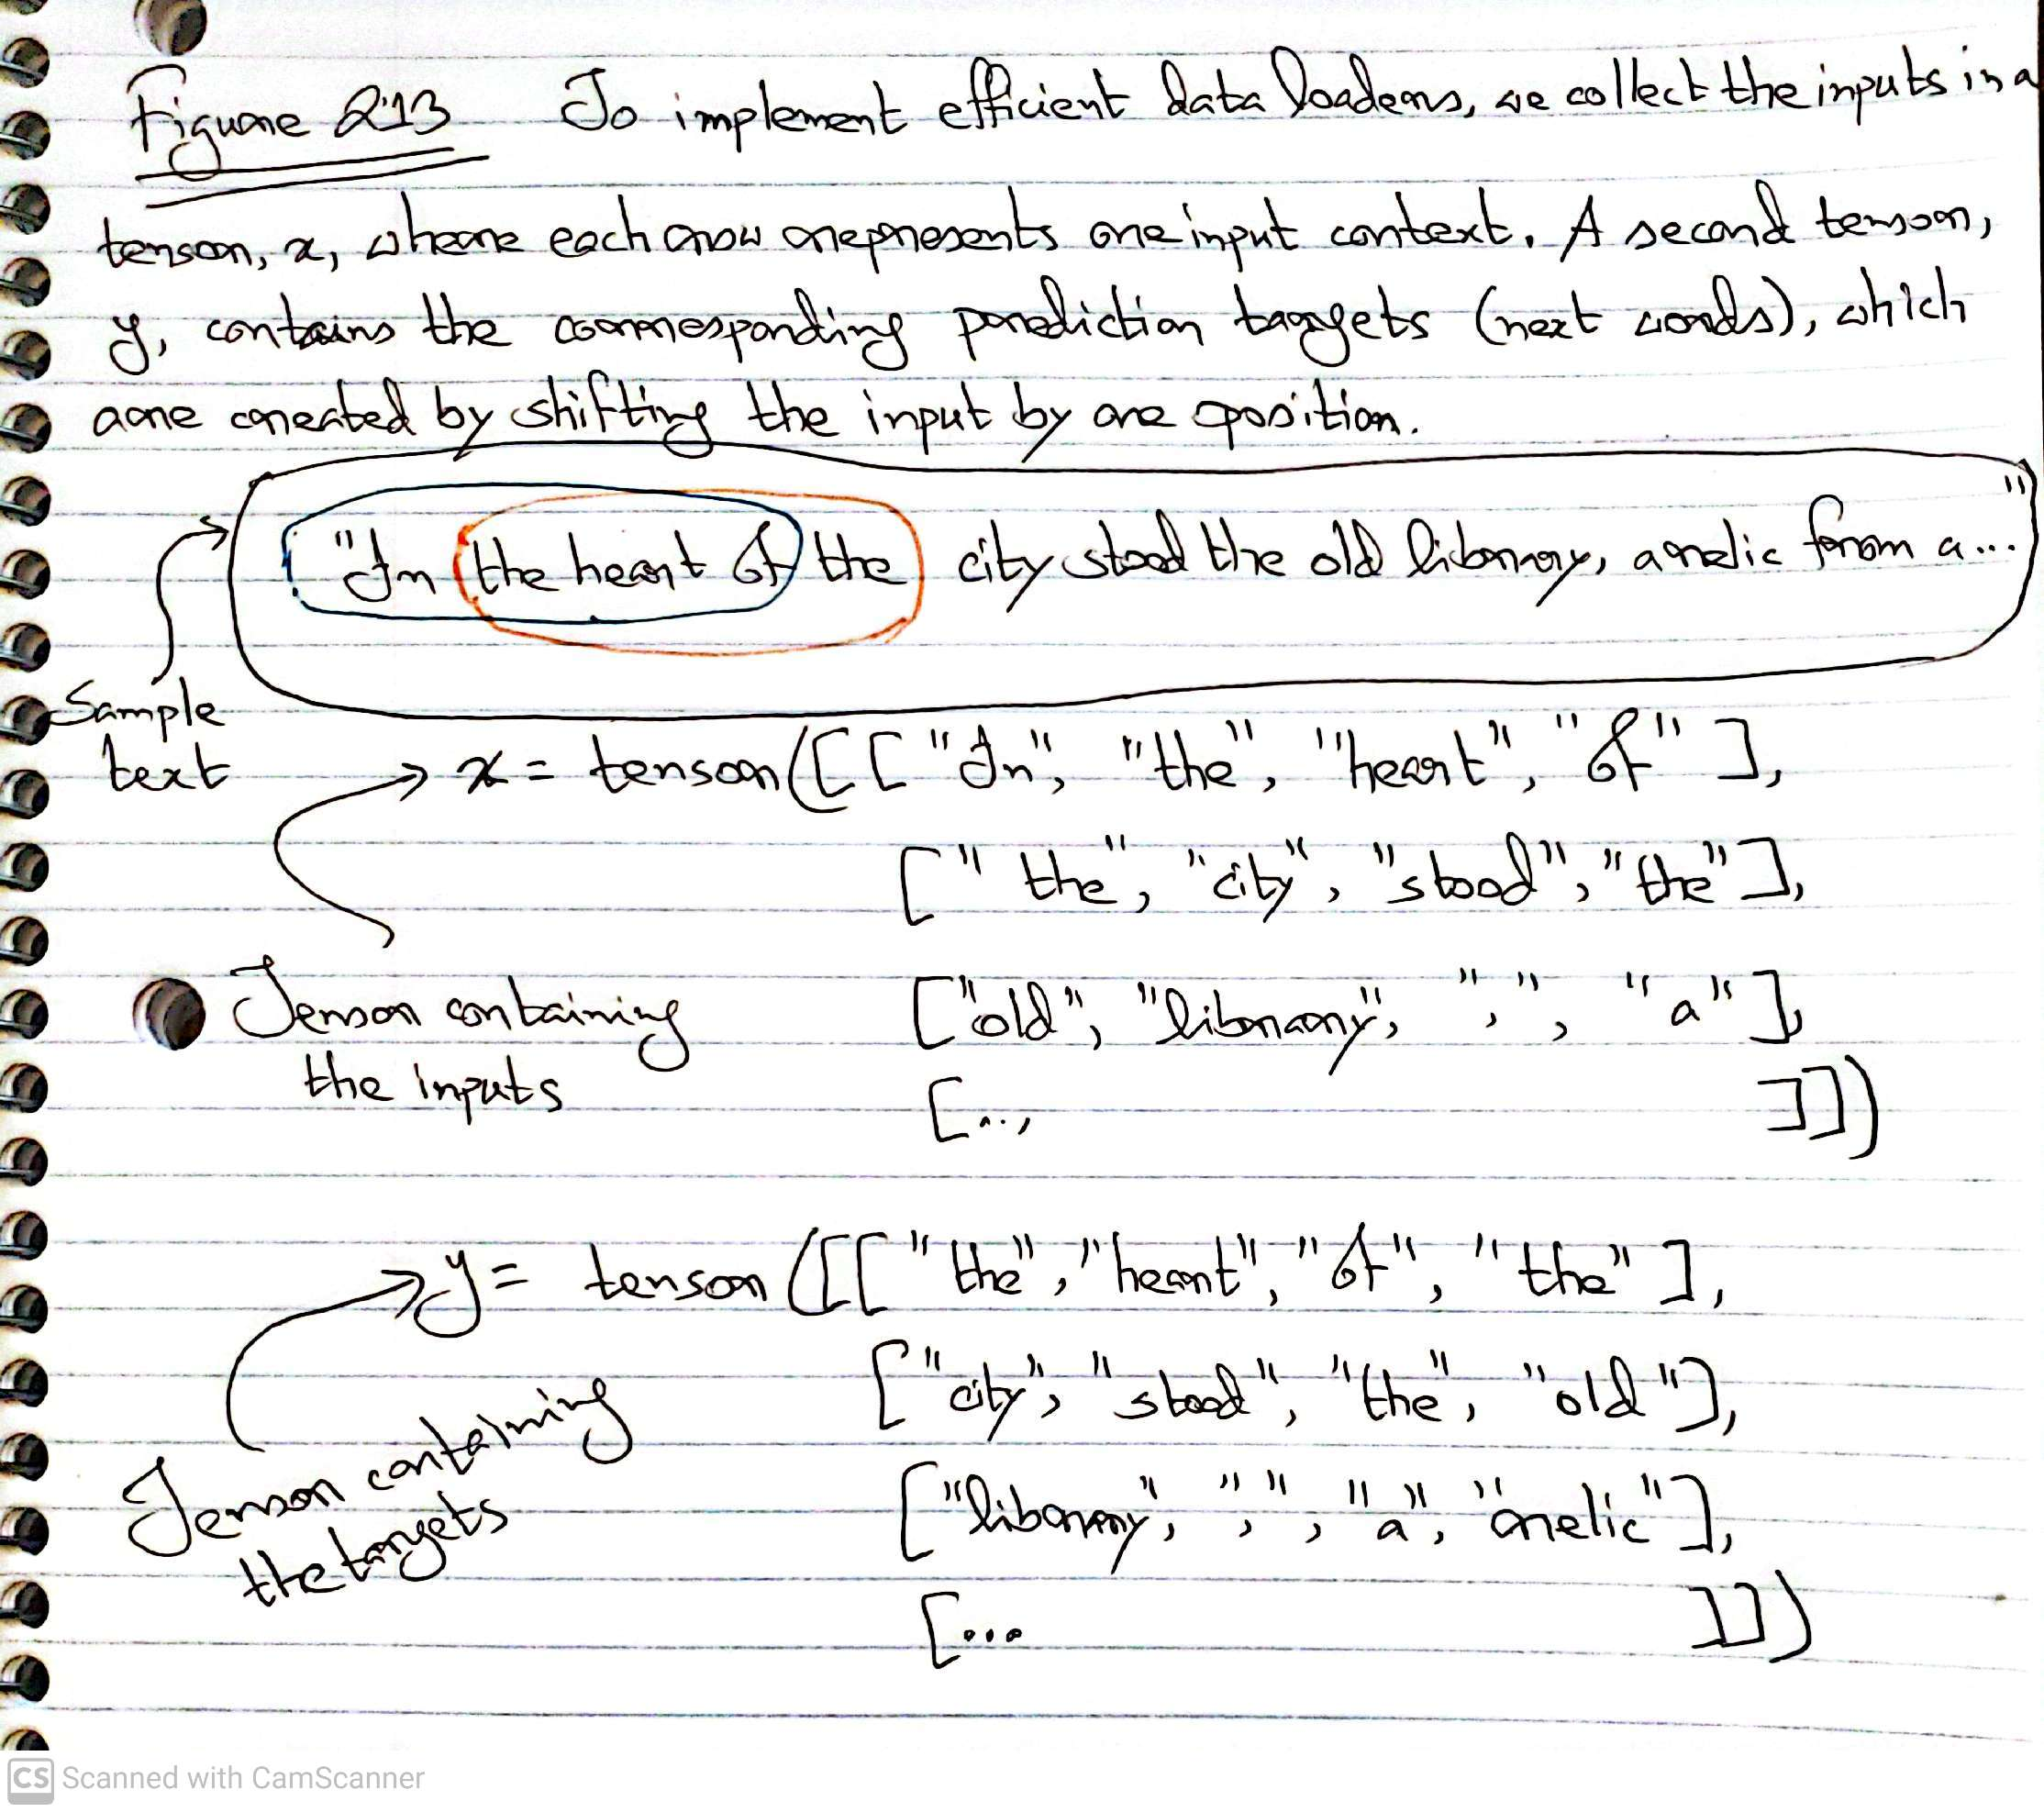

In [ ]:
display(Image(filename='2_13.jpg', width=800))

The code below defines how rows consisting of a number of token IDs are fetched from the dataset.

In [45]:
import torch
from torch.utils.data import Dataset, DataLoader
class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt)

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

### **Data loader class**

The following code allows to load the inputs in batches.

In [46]:
def create_dataloader_V1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

**Instantiate the DataLoader object.**

We are going to use a DataLoader object with context size of 4 and a stride of 1 below.

In [47]:
with open(file_path, "r", encoding="utf-8") as f:
  raw_text = f.read()

dataloader = create_dataloader_V1(raw_text, batch_size=1, max_length=4, stride=1,
                                  shuffle=False) # max_length=4 or context size = 4
data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


Usually, an input size of 4 is quite small and is chosen here for simplicity, usualy we use training sizes of at least 256 for training LLM. Now, let's have a look at the next second batch. **`stride`** allows us to specify the number of positions the inputs shift across batches. This allows us to have an approach similar to **sliding window**. Please look at the figure below where it is illustrated further.

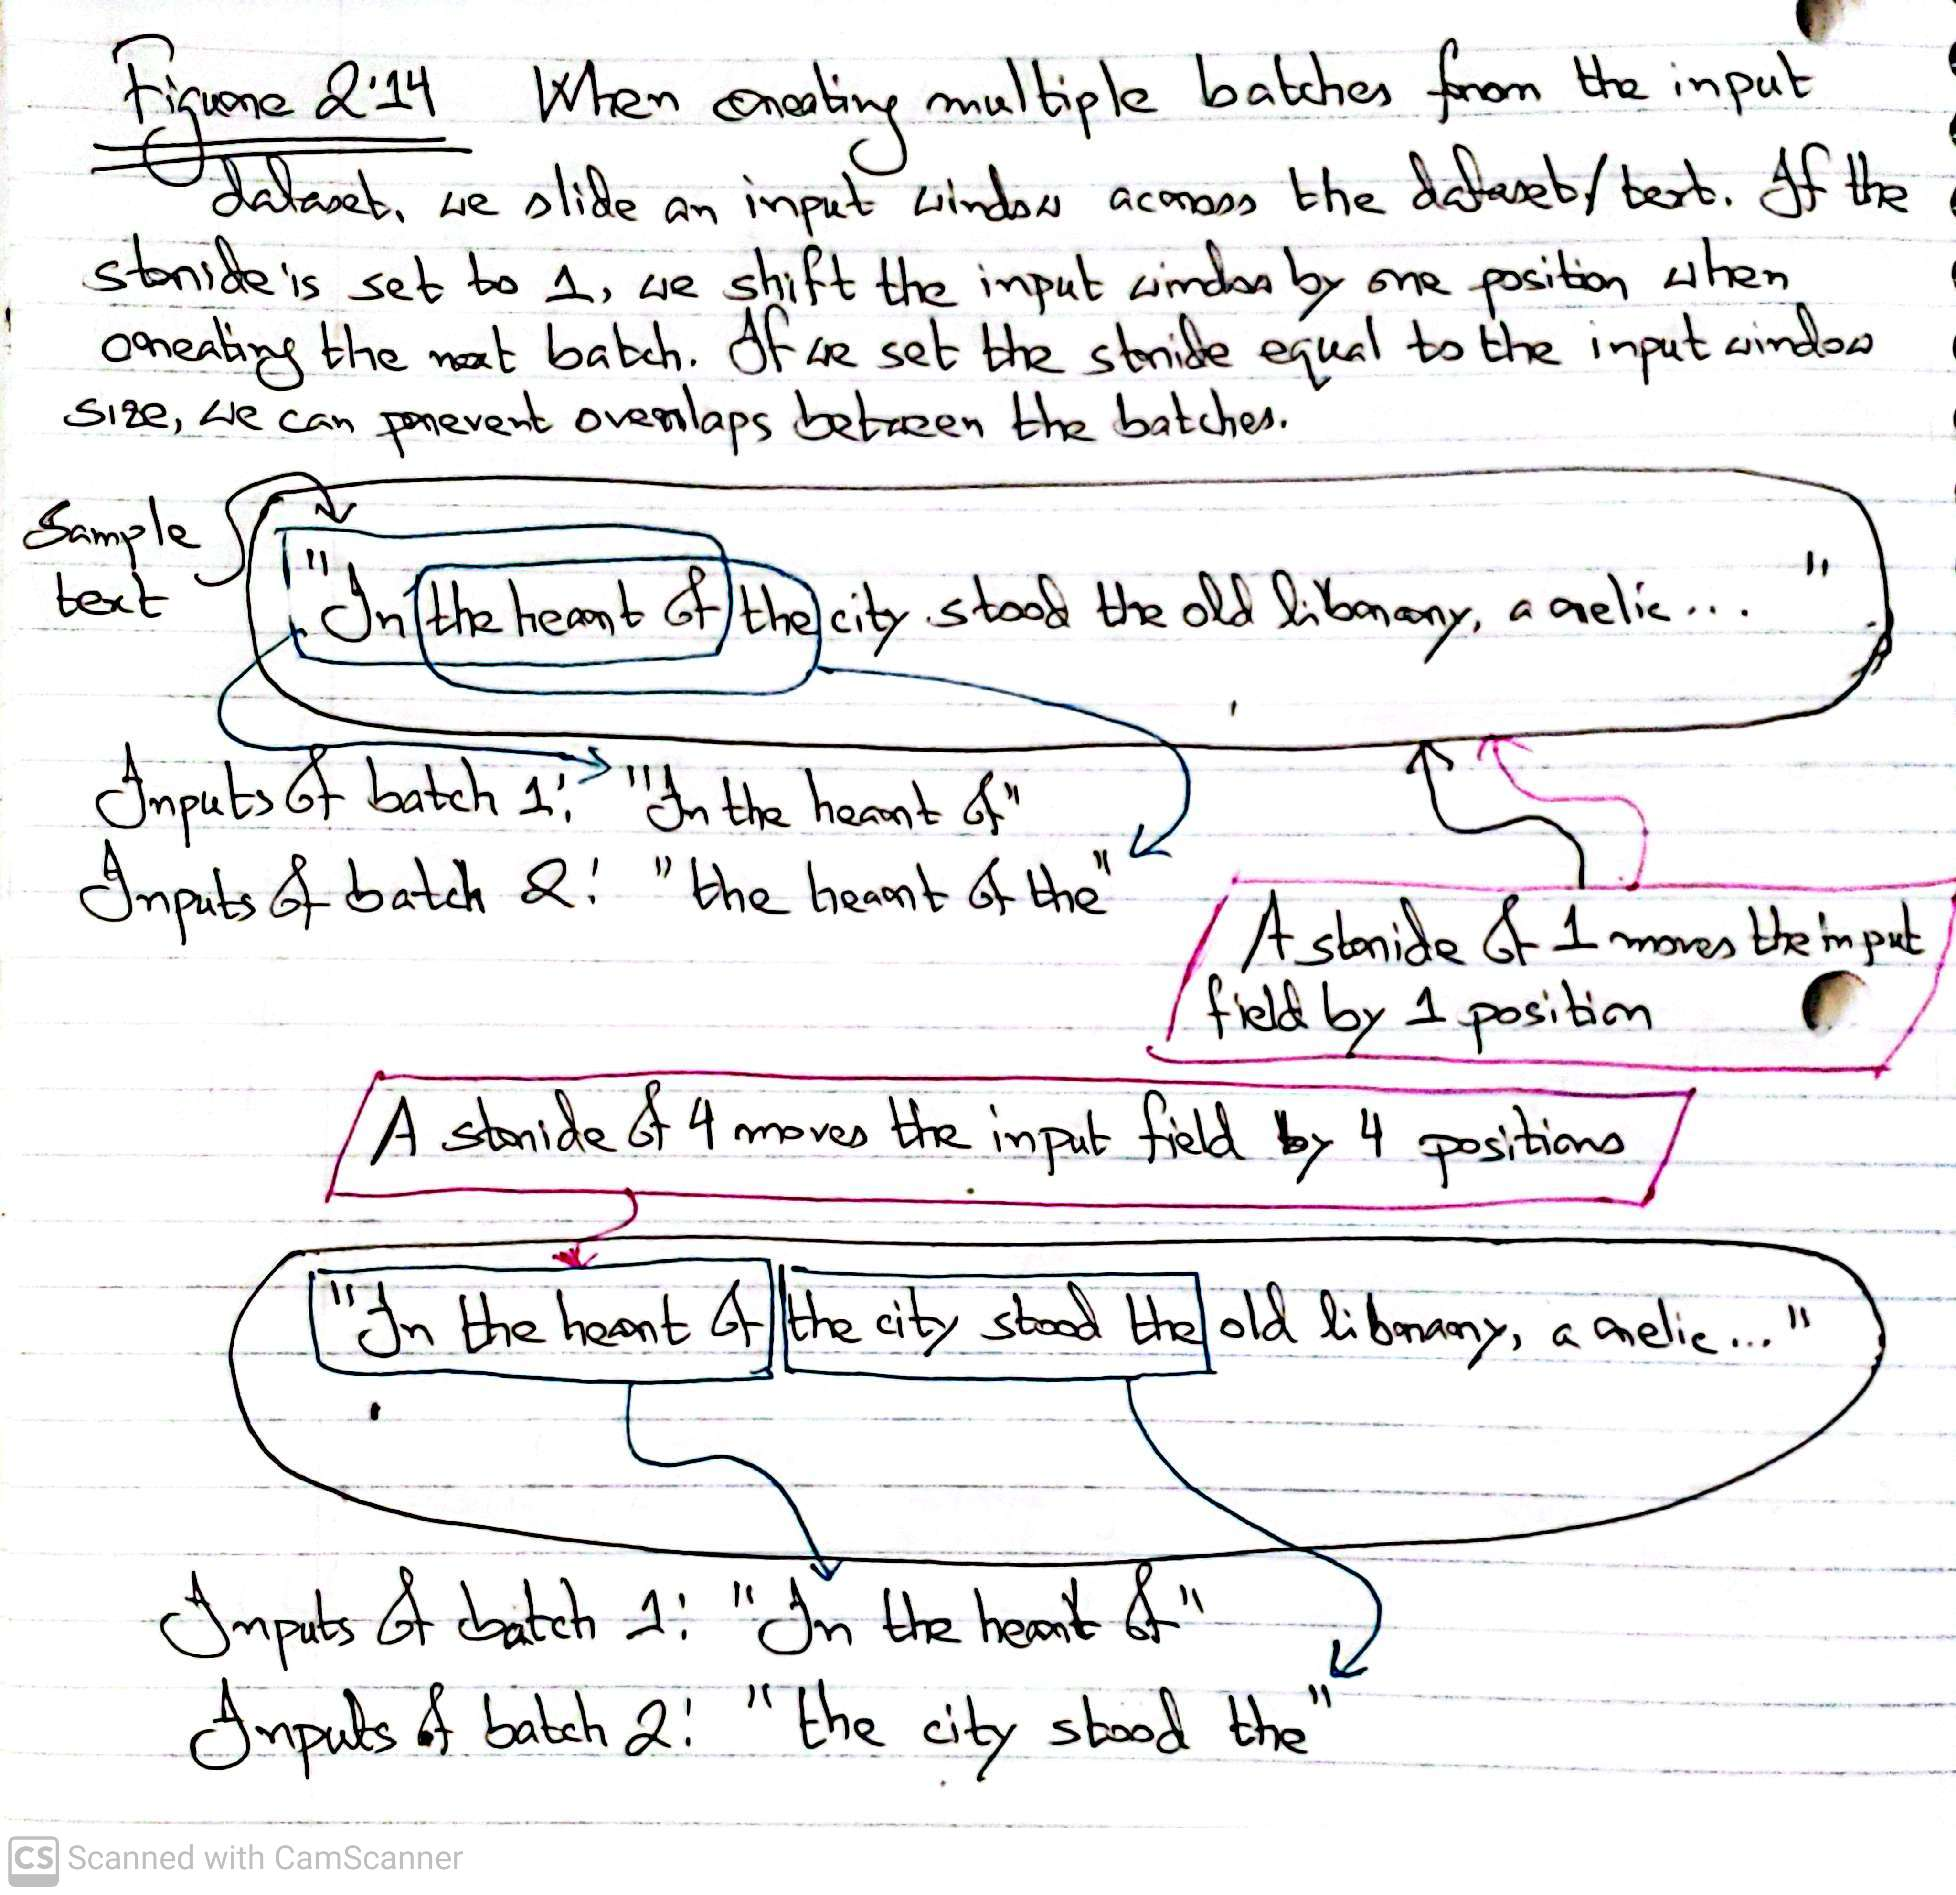

In [ ]:
display(Image(filename='2_14.jpg', width=800))

For the second batch, we can see that the token IDs are shifted by one position (the second ID in the first batch which is 367 is the first ID in the second batch).

In [48]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


Now use the dataloader to sample with a batch size greater than 1.

In [49]:
dataloader = create_dataloader_V1(raw_text, batch_size=8, max_length=4, stride=4,
                                  shuffle=False) # max_length=4 or context size = 4
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("Targets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


## **Creating token embeddings**

Now, we need to convert the token IDs into embedding vectors. We initialize these embedding weights with random values (look at the figure below). Later in Chapter 5, these weights will be optimized.



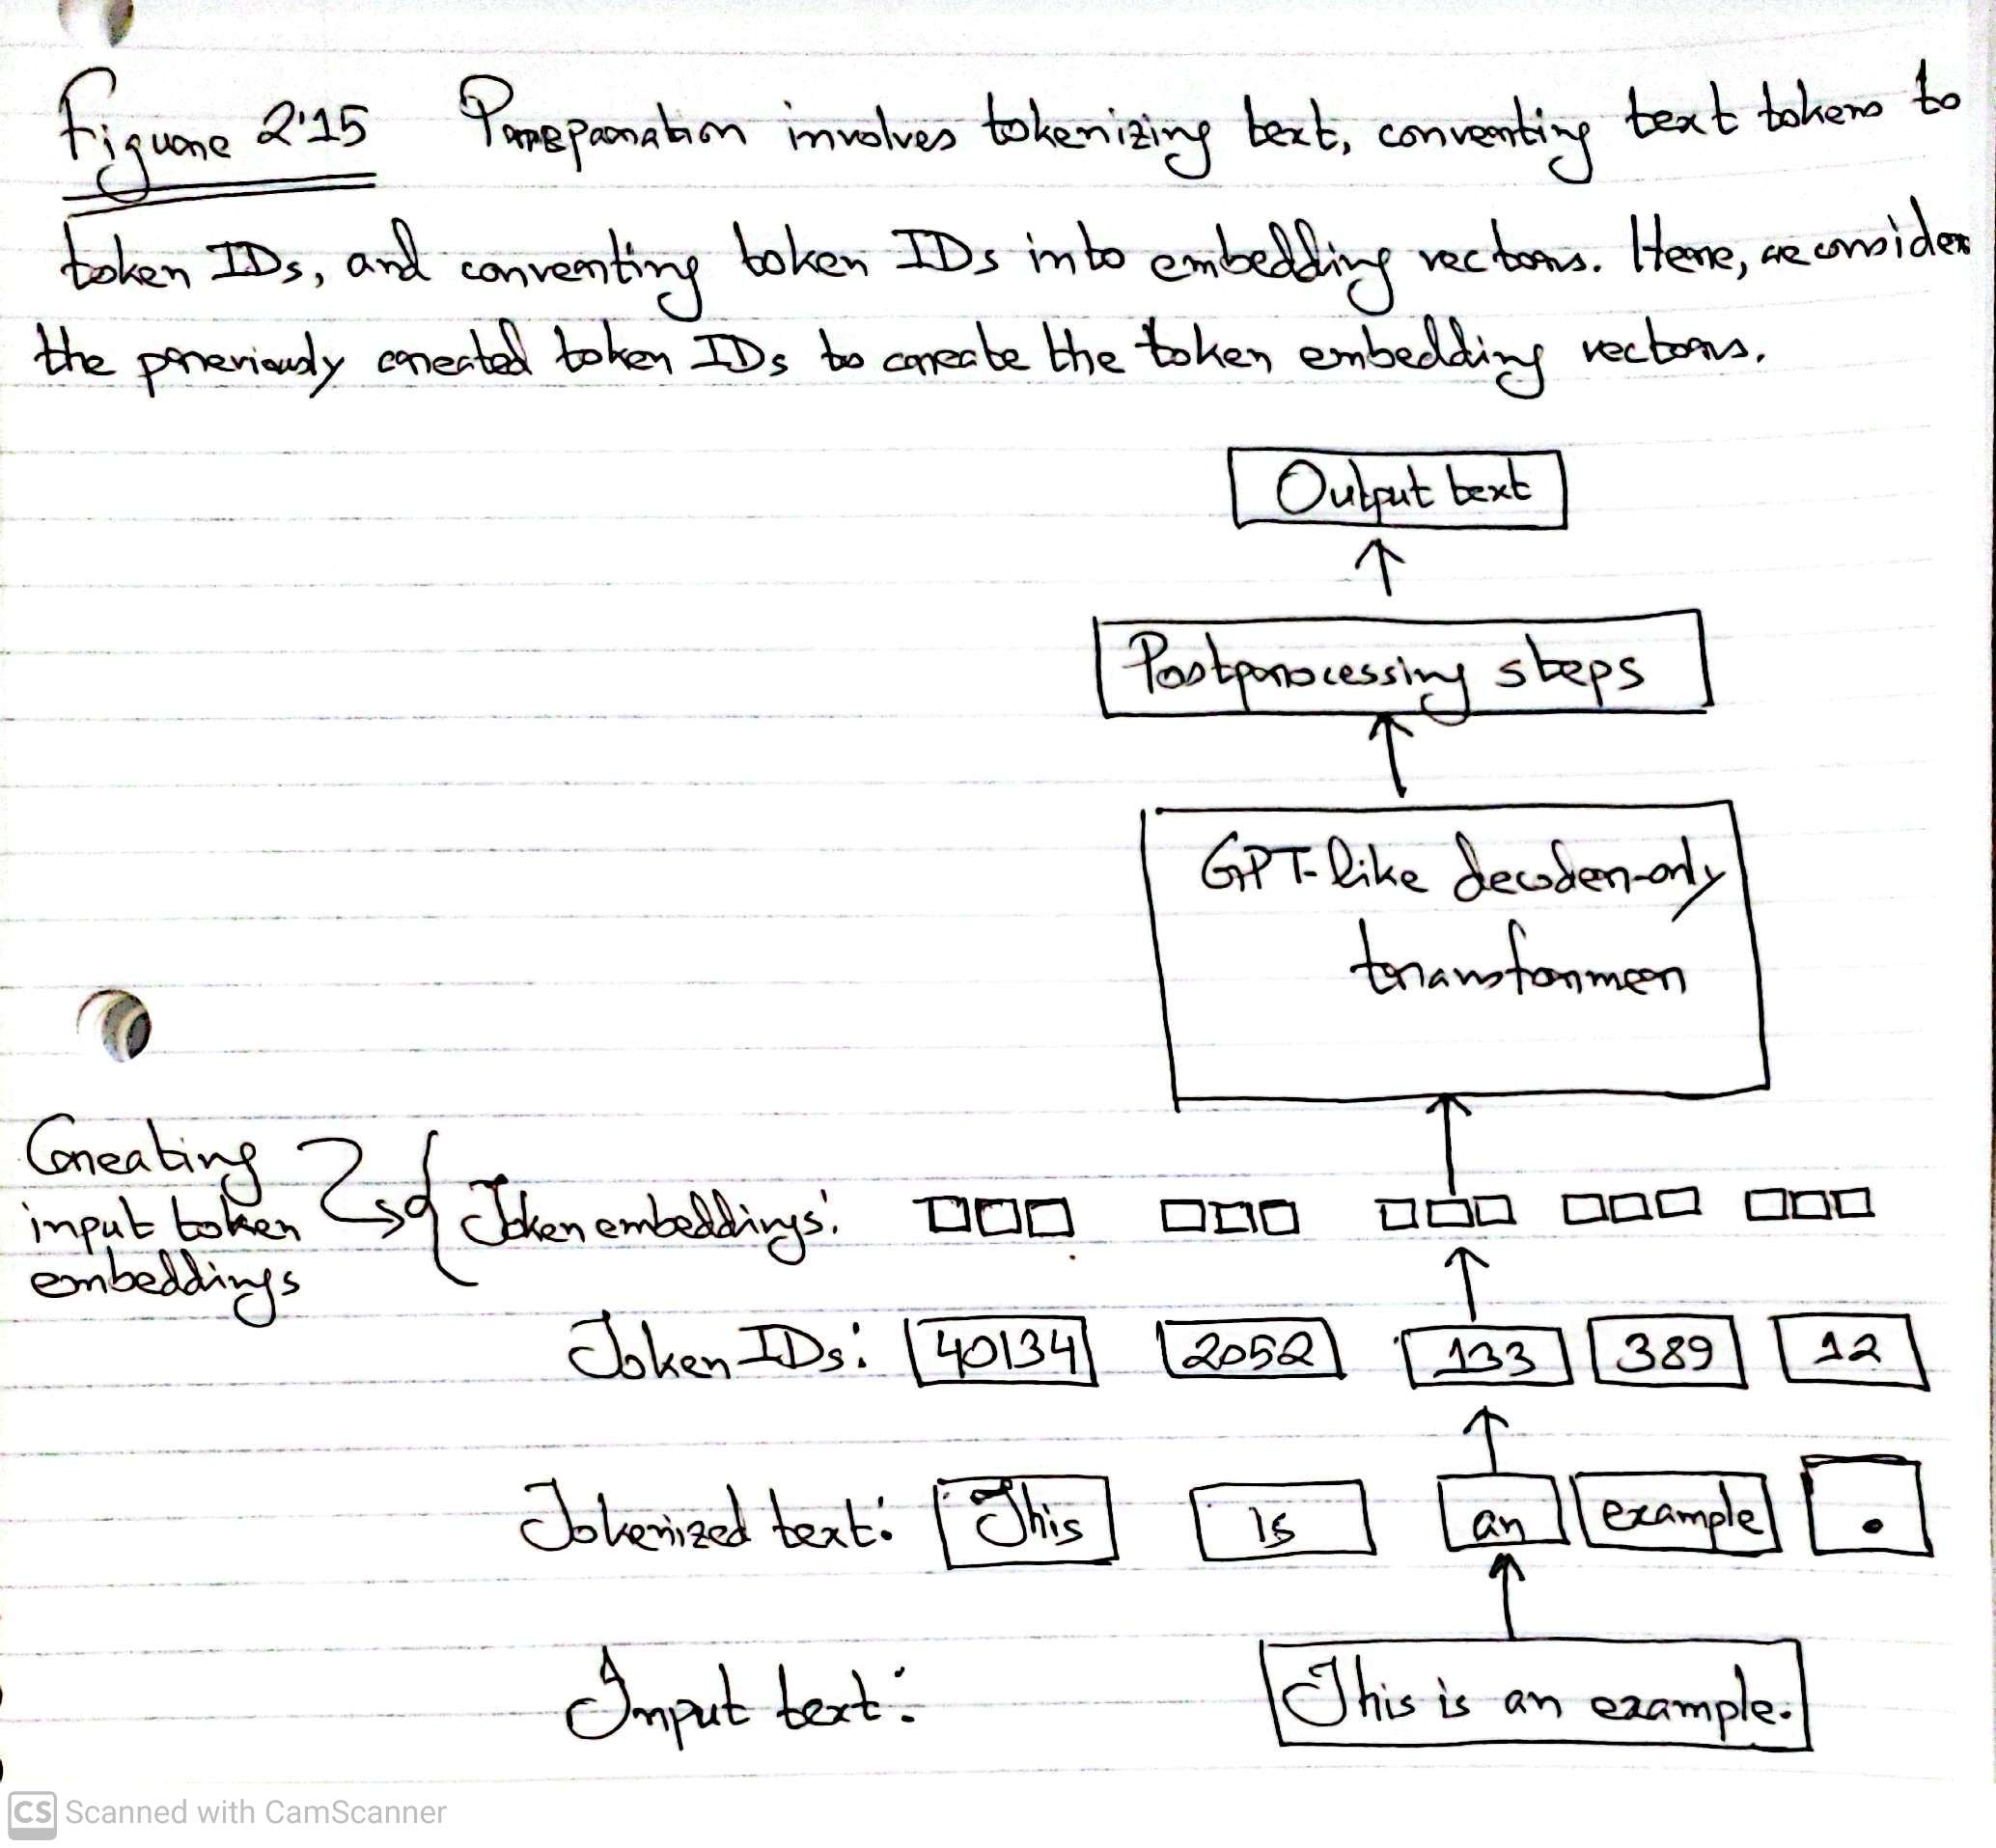

In [ ]:
display(Image(filename='2_15.jpg', width=800))

Suppose we have the following four input tokens with IDs 2, 3, 5, and 1:

In [50]:
input_ids = torch.tensor([2, 3, 5, 1])

Suppose the vocabulary size is 6 and the embedding size is 3.

In [51]:
vocab_size = 6
output_dim = 3

In [52]:
torch.manual_seed(42)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 1.9269,  1.4873, -0.4974],
        [ 0.4396, -0.7581,  1.0783],
        [ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [-0.2316,  0.0418, -0.2516],
        [ 0.8599, -0.3097, -0.3957]], requires_grad=True)


The above has one row for each of the six tokens and each token has three embedding dimensions.

### **Understanding `torch.nn.Embedding(vocab_size, output_dim)`**

The call to `torch.nn.Embedding(vocab_size, output_dim)` creates an embedding layer that maps discrete token indices into continuous vector representations. Here's a detailed explanation:

1. **Initialization of the Embedding Matrix:**
  The embedding layer creates a weight matrix of shape `(vocab_size, output_dim)`. In this example, with `vocab_size = 6` and `output_dim = 3`, it produces a matrix with 6 rows (one for each token in the vocabulary) and 3 columns (each representing the dimensionality of the token's vector). Each row is a learnable embedding vector for a token.

2. **Handling Discrete Inputs:**
  In natural language processing, words or tokens are often represented as unique integers. The embedding layer takes these integers as input and returns the corresponding row (vector) from the embedding matrix. This conversion transforms sparse, discrete representations into dense, continuous ones, which neural networks can process more effectively.

3. **Learnability and Training:**
  The weights in the embedding layer are initialized randomly (controlled here by `torch.manual_seed(123)` for reproducibility) and are set to `requires_grad=True`. This means that during training, the model will update these embedding vectors through backpropagation, allowing it to learn useful representations of the tokens based on the training data.

4. **Usefulness in Models:**

 - **Dimensionality Reduction:** By mapping tokens to vectors of a lower dimension than one-hot encodings, embeddings reduce the input dimensionality and computational cost.

 - **Semantic Representation:** Over time, as the model trains, tokens that appear in similar contexts tend to have similar embeddings, capturing semantic relationships.

 - **Flexibility:** Embedding layers are a foundational component in many neural network architectures for NLP tasks, including transformers and recurrent networks, enabling the model to handle vocabulary efficiently.

5. **Interpreting the Output:**
The printed output shows the current state of the embedding weight matrix:

```Python
Parameter containing:
tensor([[ 1.9269,  1.4873, -0.4974],
        [ 0.4396, -0.7581,  1.0783],
        [ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [-0.2316,  0.0418, -0.2516],
        [ 0.8599, -0.3097, -0.3957]], requires_grad=True)
```

- **Rows:** Each of the 6 rows corresponds to a token in the vocabulary (token indices 0 to 5).

- **Columns:** Each row contains 3 numbers representing the embedding vector for that token.

- **Trainable Parameter:** The matrix is a parameter of the model, meaning it will be updated during training to improve the model’s performance on the given task.

In summary, the embedding layer converts token indices into dense, continuous vectors that are easier for neural networks to work with. It plays a crucial role in representing linguistic information, reducing dimensionality, and capturing semantic relationships between tokens during training.

**The weight matrix of the embedding layer contains small, random values.**

Now, we can apply it to a token ID to obtain the embedding vector. Embedding vector for token ID equal to 3.

In [53]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.6866,  0.6105,  1.3347]], grad_fn=<EmbeddingBackward0>)


Embedding vector for input tokens with IDs 2, 3, 5, and 1 (`input_ids`) is given below.

In [54]:
print(embedding_layer(input_ids))

tensor([[ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [ 0.8599, -0.3097, -0.3957],
        [ 0.4396, -0.7581,  1.0783]], grad_fn=<EmbeddingBackward0>)


(ChatGPT)
### Encoding word positions

 But there is a problem, as for this embedding layer, the same token ID always gets mapped to the same vector representation, regardless of where the token ID is positioned in the input sequence.

Positional embeddings are techniques used in sequence models (like Transformers) to inject information about the order of tokens in a sequence. Since Transformers lack a built-in sense of sequence order (unlike RNNs), positional embeddings help the model understand the position of tokens within the sequence.

There are two main types of positional embeddings: absolute and relative.

**1. Absolute Positional Embeddings**
In this approach, each position in the sequence is assigned a unique embedding (vector). The position itself becomes part of the model's input representation.

**Key Features:**
- Position-Specific Representation: Each position (e.g., 1st, 2nd, 3rd) has a predefined embedding.
- Fixed or Learnable: These embeddings can be:
  - Fixed (e.g., sinusoidal functions as in the original Transformer paper).
  - Learnable (trainable embeddings similar to word embeddings).
  
**Example:**

For a sequence `A`, `B`, `C`:

- Token embeddings: `E(A)`, `E(B)`, `E(C)`
- Positional embeddings: `P(1)`, `P(2)`, `P(3)`

The model's input becomes:

```
E(A) + P(1), E(B) + P(2), E(C) + P(3)
```
**Advantage:**
Simplicity and easy integration into the model.

**Limitation:**
The embeddings are tied to absolute positions, so the model doesn’t generalize well to sequences longer than those seen during training.

**2. Relative Positional Embeddings**
Instead of embedding absolute positions, this method focuses on the relative positions between tokens. The idea is to encode the distance between tokens, such as "token X is 3 places to the left of token Y."

**Key Features:**
- **Distance-Based Representation:** Embeddings represent relative distances between pairs of tokens, such as "ahead by 1 step" or "behind by 2 steps."
- **Dynamic Calculation:** Embeddings depend on token relationships rather than fixed positions.

**Example:**
For a sequence `A, B, C`:

- Relative distances:
  - Between `A` and `B`: +1 (B is one step ahead of A)
  - Between `A` and `C`: +2 (C is two steps ahead of A)
- Embeddings for relative distances are used to adjust attention scores in the self-attention mechanism.

**Advantage:**
- Handles variable-length sequences better.
- More suitable for tasks like language modeling, where relationships between tokens matter more than their absolute positions.

**Limitation:**
Computationally more complex due to the need to compute pairwise distances.


OpenAI's GPT models use absolute positional embeddings which are optimized during training. Now, we will create the positional embeddings.

Suppose the vocabulary size is 50257 and the embedding size is 256.

In [55]:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

If we have a batch size of 8, and each batch with 4 tokens and each batch has a dimension of 256, we can define that in the following way.

In [57]:
max_length = 4
dataloader = create_dataloader_V1(raw_text, batch_size=8, max_length=max_length,
                                  stride=max_length, shuffle=False)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


Data batch consists of eight text samples with four tokens each.

In [58]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


This shows that each token ID is now embedded as a 256-dimensional vecotr.

In [59]:
inputs.shape

torch.Size([8, 4])

Each token ID is now embedded as a 256-dimensional vector.

**Create positional embedding**

In [61]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


The line

```python
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
```

creates a learnable lookup table—a positional embedding layer—that holds a unique embedding vector for each position in the sequence (from 0 up to context_length - 1).

Then, when we write

```python
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
```
we’re doing two things:

1. **Generating Position Indices:**
`torch.arange(context_length)` creates a tensor containing all the position indices (for example, `[0, 1, 2, 3]` if `context_length` is 4).

2. **Looking Up the Embeddings:**
We pass these indices into the `pos_embedding_layer` to retrieve the corresponding embedding vectors from our lookup table.

In [62]:
context_length

4

In [63]:
print(pos_embedding_layer.weight)

Parameter containing:
tensor([[ 1.2192, -0.2741,  0.6823,  ..., -2.0313, -0.3160, -0.2499],
        [ 0.1600, -2.1962,  0.4126,  ..., -1.1532,  0.4579,  1.3812],
        [-0.1451,  0.5679,  0.1859,  ...,  0.2771, -1.2594,  1.3905],
        [ 1.3473, -0.5042, -0.2962,  ...,  0.7891,  1.0097, -0.0340]],
       requires_grad=True)


In [64]:
torch.arange(context_length)

tensor([0, 1, 2, 3])

In [65]:
pos_embeddings

tensor([[ 1.2192, -0.2741,  0.6823,  ..., -2.0313, -0.3160, -0.2499],
        [ 0.1600, -2.1962,  0.4126,  ..., -1.1532,  0.4579,  1.3812],
        [-0.1451,  0.5679,  0.1859,  ...,  0.2771, -1.2594,  1.3905],
        [ 1.3473, -0.5042, -0.2962,  ...,  0.7891,  1.0097, -0.0340]],
       grad_fn=<EmbeddingBackward0>)

**But pos_embeddings = pos_embedding_layer(torch.arange(context_length)) also has the same shape, then why can't we just use pos_embedding_layer.weight?**

While it's true that both approaches yield a tensor of the same shape, there are some reasons to use the forward call rather than directly accessing the weight:

1. **Abstraction and Flexibility:**
Calling the layer with an index tensor (i.e., `pos_embedding_layer(torch.arange(context_length))`) is the intended way to use the layer. This method lets you easily select a subset of positions or apply any additional processing that might be defined in the layer's forward method.

2. **Consistency with Model Design:**
Using the forward method (`pos_embedding_layer(...)`) maintains consistency with how the layer is used during training and inference. This is beneficial if later you add modifications (such as dropout or normalization) inside the forward pass.

3. **Encapsulation:**
Directly accessing `pos_embedding_layer.weight` bypasses the layer's encapsulated logic. Even though in this simple case the output is the same, it's a good practice to interact with modules through their forward method to keep your code modular and maintainable.

In short, while both methods give you the positional embeddings, calling the layer as a function is more robust and adheres to best practices in PyTorch.

In [67]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


The `input_embeddings` can be used now by the LLM modules as shown in the figure below.

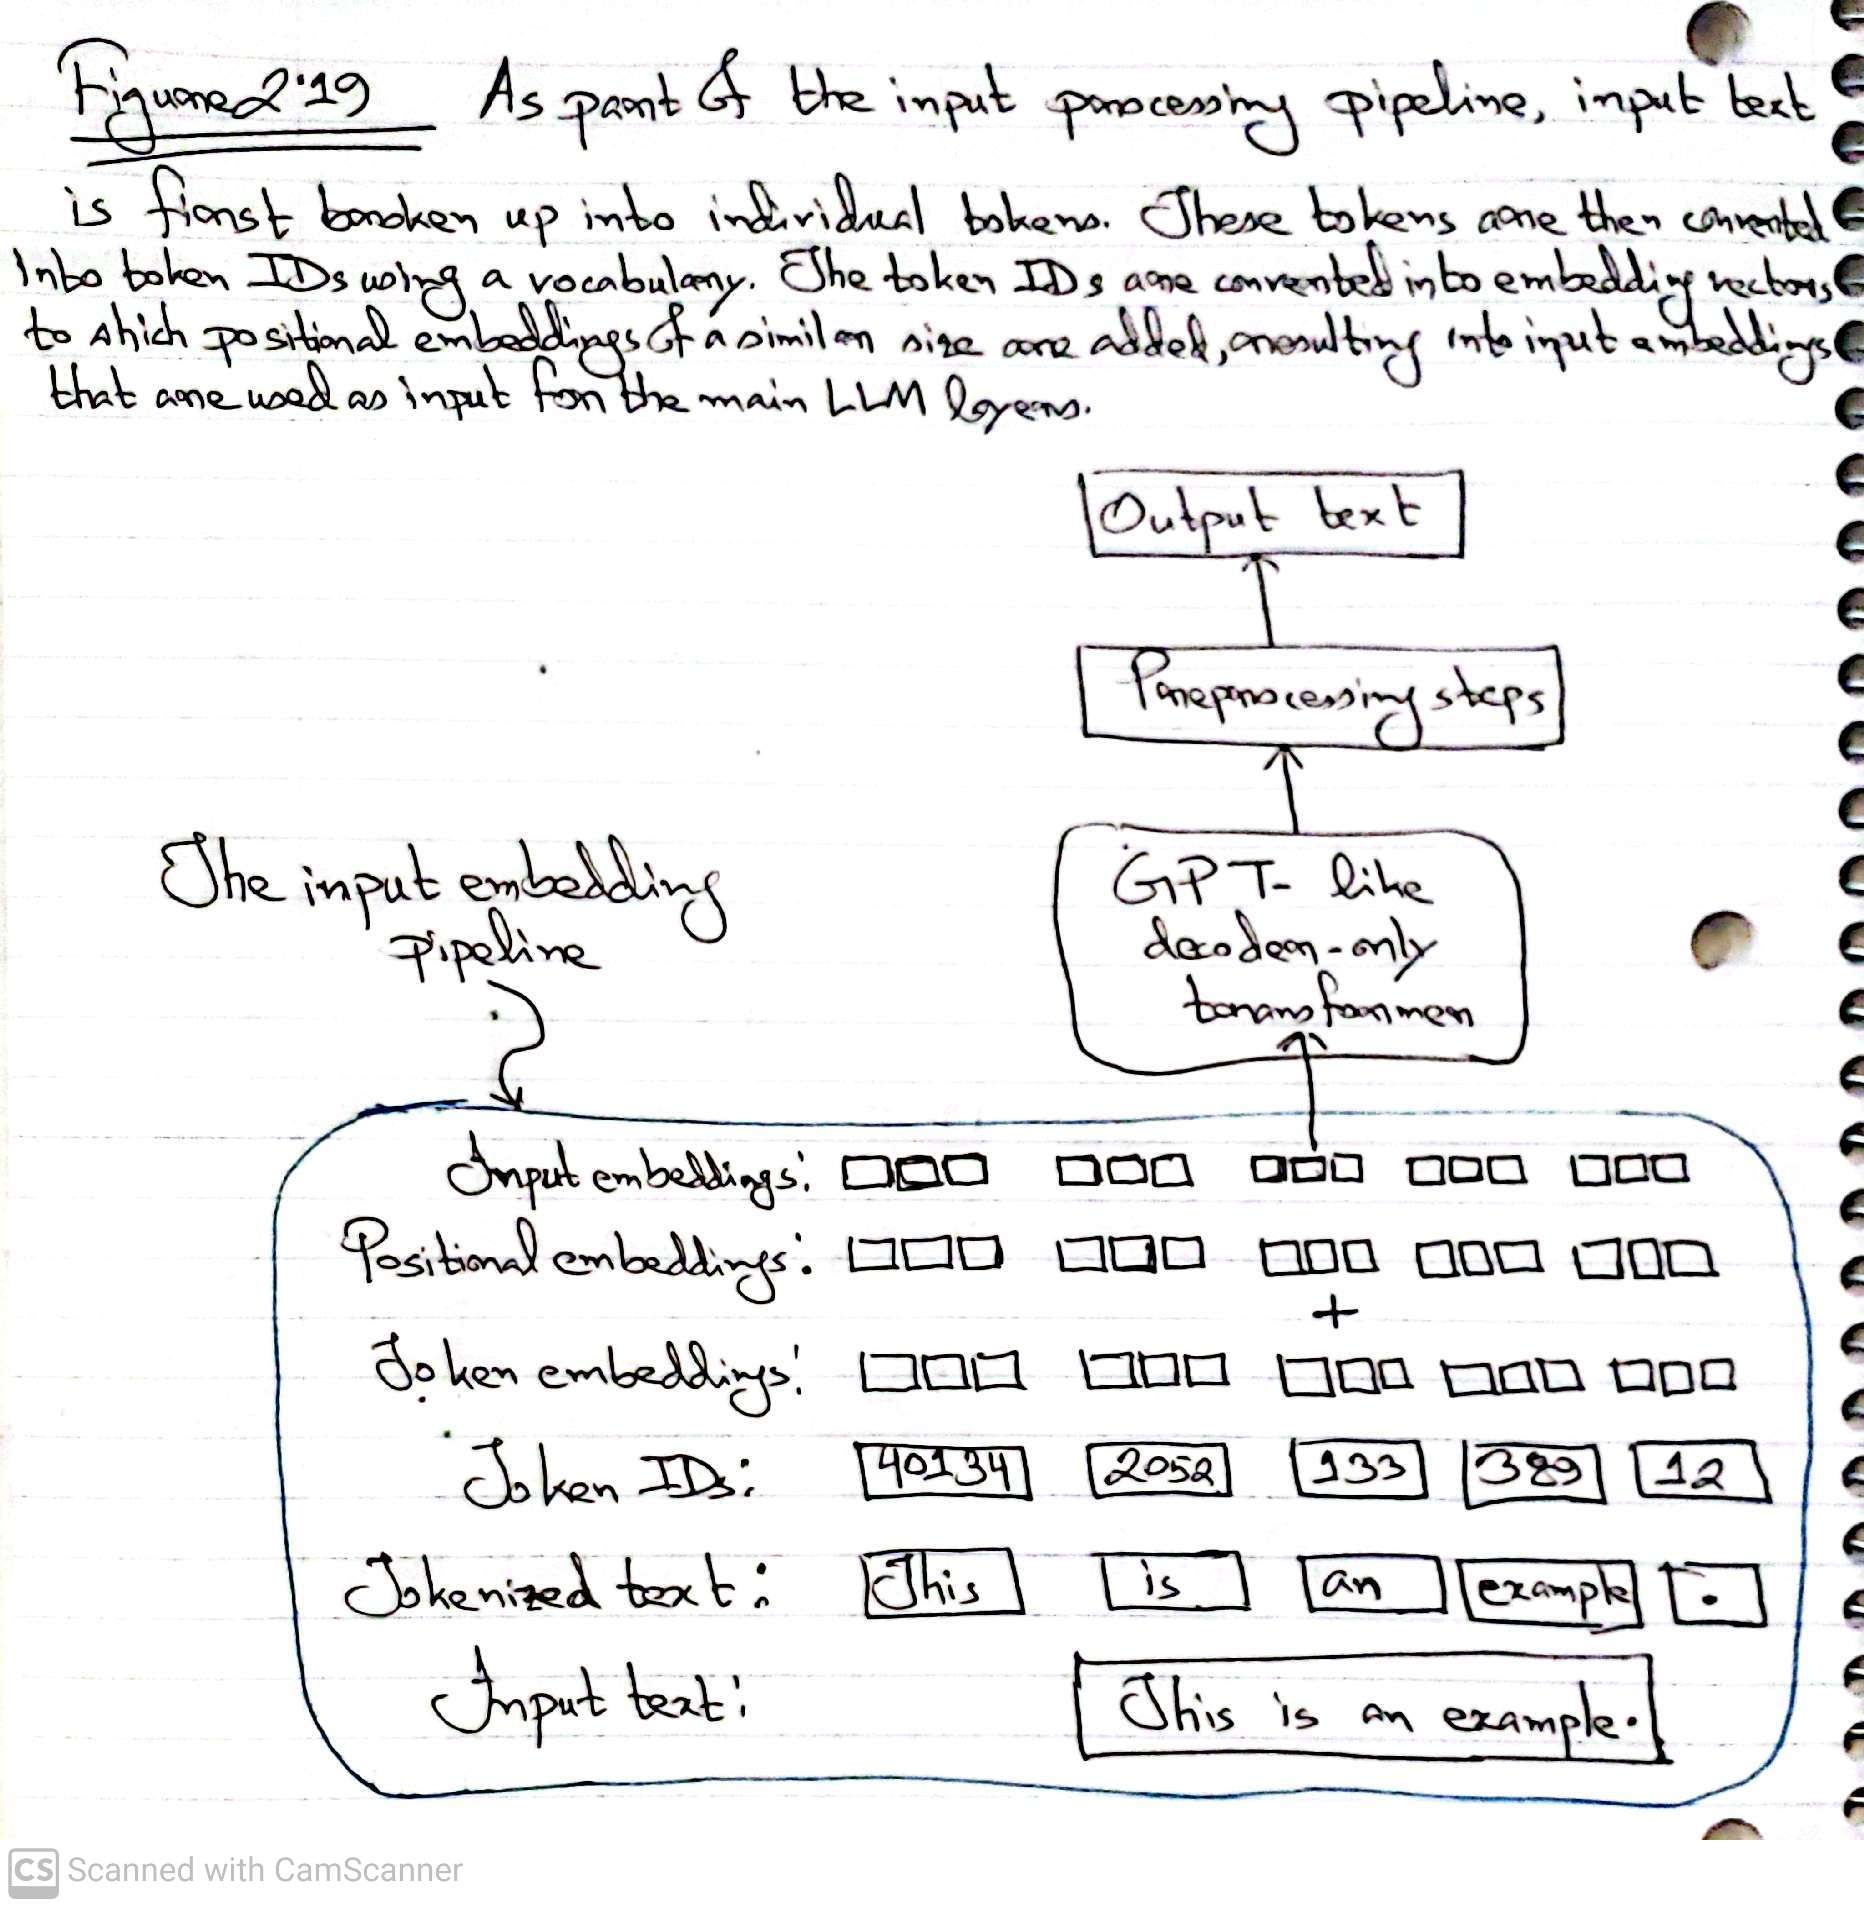

In [ ]:
display(Image(filename='2_19.jpg', width=800))

### Difference between pos_embedding_layer and pos_embeddings

Here’s the key difference between pos_embedding_layer and pos_embeddings:

1. `pos_embedding_layer`

- This is the embedding layer object itself, an instance of torch.nn.Embedding.Think of it like a dictionary or lookup table: you give it an integer index (position), it returns a vector. It contains the parameters (weights) that are learned during training. You can call it repeatedly with different input indices to get embeddings dynamically.

- Example:

  ```python
  pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
  ```

2. `pos_embeddings`

  - This is the actual tensor output you get after passing all position indices (0 to context_length - 1) through pos_embedding_layer. It is a fixed tensor of shape (context_length, output_dim) at that moment. It contains the positional embedding vectors for every position in the sequence. Usually used when you want to get all positional embeddings at once and add them to token embeddings.

 Example:

  ```python
  pos_embeddings = pos_embedding_layer(torch.arange(context_length))
  ```

#### **Analogy**

- `pos_embedding_layer` = The whole dictionary with all words and their meanings (learnable weights).

- `pos_embeddings` = The list of all meanings (vectors) you get when you look up the entire dictionary.